In [508]:
from platform import python_version
python_version()

'3.9.12'

In [1]:
import pandas as pd
from scipy.io.arff import loadarff 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, log_loss, classification_report
import matplotlib.pyplot as plt
import numpy as np
import time
from copy import deepcopy
import numbers
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# read data

## data1
https://www.openml.org/search?type=data&id=1120&sort=runs&status=active

In [66]:
data1_name = 'Telescope'
raw_data1 = loadarff('MagicTelescope.arff')
data1 = pd.DataFrame(raw_data1[0])
data1 = data1.drop(columns=['ID'])
data1 = data1.rename(columns=lambda x: x.replace(':', ''))
data1['class'] = data1['class'].str.decode('utf-8')
data1 = pd.concat([
    data1[data1['class']=='g'].sample(510, random_state=0),
    data1[data1['class']=='h'].sample(490, random_state=0)])
data1.index = range(len(data1))
data1

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,69.2979,26.8809,3.1930,0.2065,0.1074,39.6296,44.3457,-23.0604,9.3234,248.7500,g
1,24.5939,10.1418,2.5676,0.5007,0.2693,-8.4503,15.2452,-7.0283,17.0056,173.2880,g
2,55.4800,27.1606,3.1826,0.2299,0.1225,43.1016,54.2556,13.7406,32.2220,262.1810,g
3,12.6594,11.7413,2.1351,0.7033,0.3846,-15.8596,9.4522,-8.7126,43.5434,227.7110,g
4,38.6204,20.5632,2.9770,0.2478,0.1270,-13.8229,-31.3983,-13.1337,5.8671,192.4670,g
...,...,...,...,...,...,...,...,...,...,...,...
995,17.5875,15.8431,2.5563,0.5889,0.4069,-4.9856,-8.9744,6.0916,27.3912,98.9112,h
996,51.5102,10.0816,2.8742,0.3848,0.2265,21.7655,28.1719,8.0106,45.8060,163.5740,h
997,60.5159,13.5790,3.0125,0.3476,0.2103,61.5637,60.1913,5.2105,2.8626,247.4307,h
998,13.4287,12.5724,2.5091,0.4125,0.2284,11.3890,13.6556,1.7479,51.2221,174.8656,h


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6697 to 16945
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   1000 non-null   float64
 1   fWidth    1000 non-null   float64
 2   fSize     1000 non-null   float64
 3   fConc     1000 non-null   float64
 4   fConc1    1000 non-null   float64
 5   fAsym     1000 non-null   float64
 6   fM3Long   1000 non-null   float64
 7   fM3Trans  1000 non-null   float64
 8   fAlpha    1000 non-null   float64
 9   fDist     1000 non-null   float64
 10  class     1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


In [365]:
data1.drop_duplicates().shape

(998, 11)

## data2
https://www.openml.org/search?type=data&status=active&id=287

In [135]:
data2_name = 'Wine'
raw_data2 = loadarff('wine-quality-red.arff')
data2 = pd.DataFrame(raw_data2[0])
print(data2.shape)
data2['class'] = data2['class'].str.decode('utf-8')
print(data2['class'].value_counts())
data2 = pd.concat([
    data2[data2['class']=='5'].sample(400, random_state=0),
    data2[data2['class']=='6'].sample(400, random_state=0),
    data2[data2['class']=='7']])
data2.index = range(len(data2))
data2

(1599, 12)
5    681
6    638
7    199
4     53
8     18
3     10
Name: class, dtype: int64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.3,0.38,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.50,5
1,6.7,0.48,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.70,5
2,9.9,0.63,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.40,5
3,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.50,5
4,11.3,0.37,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
994,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,7
995,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
996,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
997,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 176 to 1584
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         999 non-null    float64
 1   volatile_acidity      999 non-null    float64
 2   citric_acid           999 non-null    float64
 3   residual_sugar        999 non-null    float64
 4   chlorides             999 non-null    float64
 5   free_sulfur_dioxide   999 non-null    float64
 6   total_sulfur_dioxide  999 non-null    float64
 7   density               999 non-null    float64
 8   pH                    999 non-null    float64
 9   sulphates             999 non-null    float64
 10  alcohol               999 non-null    float64
 11  class                 999 non-null    object 
dtypes: float64(11), object(1)
memory usage: 101.5+ KB


## split data

In [68]:
X1=data1.drop(columns=['class'])
y1=data1['class']
min_max_scaler = MinMaxScaler()
X1_scaled = min_max_scaler.fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns=X1.columns)
print(y1.value_counts())

g    510
h    490
Name: class, dtype: int64


In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.3, random_state=0, stratify=y1)
X1_train_train, X1_val, y1_train_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=0, stratify=y1_train)
print(X1_train)
print(X1_test)
print(y1_train)
print(y1_test)

      fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
963  0.109647  0.071653  0.160242  0.617064  0.457325  0.407011  0.532015   
328  0.039686  0.052310  0.064303  0.654354  0.559554  0.423930  0.564162   
643  0.295283  0.114117  0.392121  0.362049  0.272134  0.423327  0.696367   
101  0.049110  0.067097  0.106788  0.509795  0.385032  0.415304  0.569123   
414  0.030426  0.059205  0.078091  0.684919  0.645701  0.454538  0.583202   
..        ...       ...       ...       ...       ...       ...       ...   
664  0.321828  0.227335  0.579364  0.088860  0.081210  0.487987  0.829043   
206  0.193320  0.119584  0.423667  0.181142  0.143471  0.457584  0.696833   
869  0.100069  0.099817  0.257485  0.323932  0.250159  0.453695  0.641972   
462  0.215403  0.200671  0.327788  0.350956  0.345223  0.491485  0.515829   
377  0.133631  0.130476  0.253455  0.269766  0.244745  0.513625  0.653350   

     fM3Trans    fAlpha     fDist  
963  0.561137  0.514833  0.511096  
328

In [71]:
X2=data2.drop(columns=['class'])
y2=data2['class']
print(y2.value_counts())
min_max_scaler = MinMaxScaler()
X2_scaled = min_max_scaler.fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=0, stratify=y2)
X2_train_train, X2_val, y2_train_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=0, stratify=y2_train)

5    400
6    400
7    199
Name: class, dtype: int64


# decision tree

## tune hyper-parameter

In [12]:
def tune_hyper(X_train, y_train, classifier, param_grid):
    skfolds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    search_f1 = GridSearchCV(classifier, param_grid, cv=skfolds, scoring='f1_weighted', return_train_score=True, n_jobs=-1)
    search_f1.fit(X_train.values, y_train.values)
    best_classifier = search_f1.best_estimator_
    best_f1 = search_f1.best_score_
    best_params = search_f1.best_params_
    cv_result = pd.DataFrame(search_f1.cv_results_)
    print(f'Best classifier is {best_classifier} with f1 score {best_f1}')
    return best_params, cv_result

In [377]:
def plot_validation_curve(hyper, params, cv_result, model_type, data_name, hyper_name=None, log_x=False, rot_x=False):
    if hyper_name is None:
        hyper_name = hyper
    cv_result_hyper = cv_result.copy()
    change_ticks = False
    for param in params:
        if param != hyper:
            cv_result_hyper = cv_result_hyper[cv_result_hyper[f'param_{param}']==params[param]]
    hyper_list = cv_result_hyper[f'param_{hyper}']
    f1_train_list = cv_result_hyper['mean_train_score']
    f1_val_list = cv_result_hyper['mean_test_score']
    if not isinstance(list(hyper_list)[0], numbers.Number):
        change_ticks = True
        tick_label_list = hyper_list
        hyper_list = list(range(len(hyper_list)))
    plt.plot(hyper_list, f1_train_list, '-o', label='train')
    plt.plot(hyper_list, f1_val_list, '-o', label='validation')
    if log_x:
        plt.xscale('log')
    if change_ticks:
        rotation = 0
        if rot_x == True:
            rotation = 45
        plt.xticks(hyper_list, tick_label_list, rotation=rotation)
    plt.xlabel(f'{hyper_name}')
    plt.ylabel('Performance (F1 Score)')
    plt.legend()
    plt.title(f'{model_type} Validation Curve  - {data_name}')
    plt.show()

### data1

Best classifier is DecisionTreeClassifier(ccp_alpha=0.008, min_samples_leaf=13, random_state=0) with f1 score 0.7648605747049462


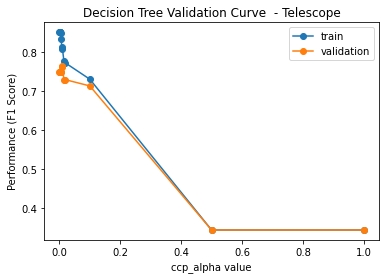

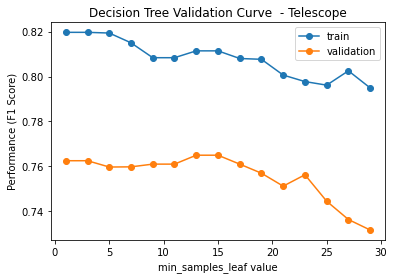

In [295]:
classifier = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [1, 0.5, 0.1, 0.02, 0.015, 0.01, 0.008, 0.006, 0.004, 0.003, 0.002, 0.0015, 0.001, 0.0005, 0.0001],
    'min_samples_leaf': range(1,31,2),
}
best_tree_params1, tree_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
model_type = 'Decision Tree'
hyper = 'ccp_alpha'
plot_validation_curve(hyper, params=best_tree_params1, cv_result=tree_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'min_samples_leaf'
plot_validation_curve(hyper, params=best_tree_params1, cv_result=tree_cv_result1, model_type=model_type, data_name=data1_name)

Best classifier is DecisionTreeClassifier(ccp_alpha=0.008, min_samples_leaf=13, random_state=0) with f1 score 0.7648605747049462


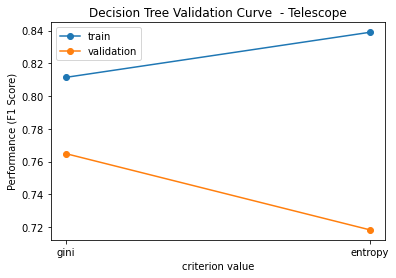

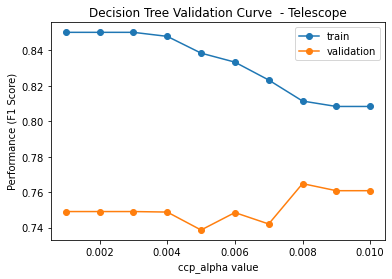

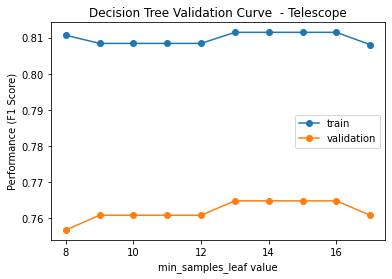

In [296]:
classifier = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001],
    'min_samples_leaf': range(8,18,1),
}
best_tree_params1, tree_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
model_type = 'Decision Tree'
hyper = 'criterion'
plot_validation_curve(hyper, params=best_tree_params1, cv_result=tree_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'ccp_alpha'
plot_validation_curve(hyper, params=best_tree_params1, cv_result=tree_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'min_samples_leaf'
plot_validation_curve(hyper, params=best_tree_params1, cv_result=tree_cv_result1, model_type=model_type, data_name=data1_name)

#### best ccp_alpha

In [124]:
best_tree_classifier1 = DecisionTreeClassifier(random_state=0, **best_tree_params1)
best_tree_classifier1.fit(X1_train, y1_train)
best_tree_classifier1.tree_.max_depth, best_tree_classifier1.tree_.node_count

(5, 15)

In [130]:
# overfitting
tree_params1 = deepcopy(best_tree_params1)
tree_params1['ccp_alpha'] = 0.007
tree_classifier1 = DecisionTreeClassifier(random_state=0, **tree_params1)
tree_classifier1.fit(X1_train, y1_train)
tree_classifier1.tree_.max_depth, tree_classifier1.tree_.node_count

(5, 19)

In [131]:
# underfitting
tree_params1 = deepcopy(best_tree_params1)
tree_params1['ccp_alpha'] = 0.009
tree_classifier1 = DecisionTreeClassifier(random_state=0, **tree_params1)
tree_classifier1.fit(X1_train, y1_train)
tree_classifier1.tree_.max_depth, tree_classifier1.tree_.node_count

(4, 13)

#### best min_samples_leaf

In [276]:
# overfitting
tree_params1 = deepcopy(best_tree_params1)
tree_params1['min_samples_leaf'] = 5
tree_classifier1 = DecisionTreeClassifier(random_state=0, **tree_params1)
tree_classifier1.fit(X1_train, y1_train)
tree_classifier1.tree_.max_depth, tree_classifier1.tree_.node_count

(6, 21)

In [277]:
# underfitting
tree_params1 = deepcopy(best_tree_params1)
tree_params1['min_samples_leaf'] = 25
tree_classifier1 = DecisionTreeClassifier(random_state=0, **tree_params1)
tree_classifier1.fit(X1_train, y1_train)
tree_classifier1.tree_.max_depth, tree_classifier1.tree_.node_count

(4, 13)

### data2

Best classifier is DecisionTreeClassifier(ccp_alpha=0.002, random_state=0) with f1 score 0.5756254191743314


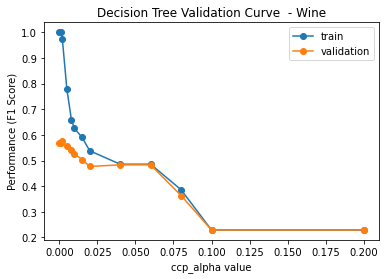

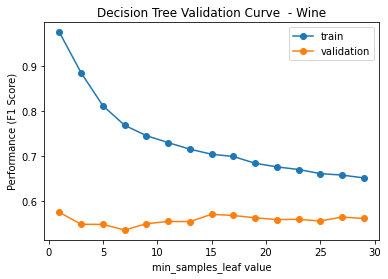

In [312]:
classifier = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.2, 0.1, 0.08, 0.06, 0.04, 0.02, 0.015, 0.01, 0.008, 0.005, 0.002, 0.001, 0.0001],
    'min_samples_leaf': range(1,31,2),
}
best_tree_params2, tree_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
model_type='Decision Tree'
hyper = 'ccp_alpha'
plot_validation_curve(hyper, params=best_tree_params2, cv_result=tree_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'min_samples_leaf'
plot_validation_curve(hyper, params=best_tree_params2, cv_result=tree_cv_result2, model_type=model_type, data_name=data2_name)

Best classifier is DecisionTreeClassifier(ccp_alpha=0.004, random_state=0) with f1 score 0.5805851369160877


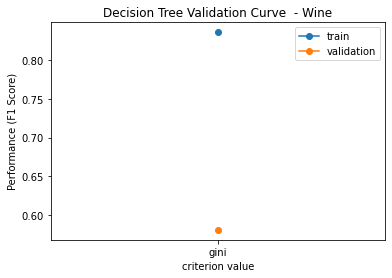

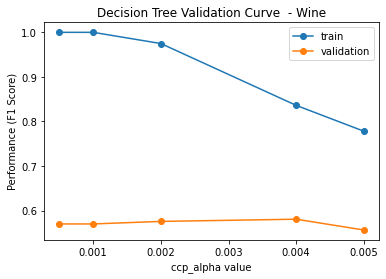

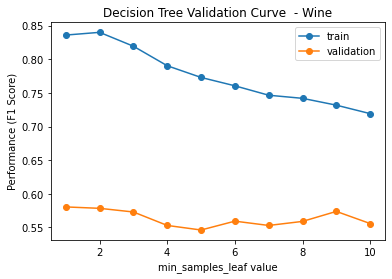

In [342]:
classifier = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini'],
    'ccp_alpha': [0.005, 0.004, 0.002, 0.001, 0.0005],
    'min_samples_leaf': range(1,11,1),
}
best_tree_params2, tree_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
model_type='Decision Tree'
hyper = 'criterion'
plot_validation_curve(hyper, params=best_tree_params2, cv_result=tree_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'ccp_alpha'
plot_validation_curve(hyper, params=best_tree_params2, cv_result=tree_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'min_samples_leaf'
plot_validation_curve(hyper, params=best_tree_params2, cv_result=tree_cv_result2, model_type=model_type, data_name=data2_name)

In [126]:
best_tree_classifier2 = DecisionTreeClassifier(random_state=0, **best_tree_params2)
best_tree_classifier2.fit(X2_train, y2_train)
best_tree_classifier2.tree_.max_depth, best_tree_classifier2.tree_.node_count

(10, 77)

In [128]:
# overfitting
tree_params2 = deepcopy(best_tree_params2)
tree_params2['ccp_alpha'] = 0.003
tree_classifier2 = DecisionTreeClassifier(random_state=0, **tree_params2)
tree_classifier2.fit(X2_train, y2_train)
tree_classifier2.tree_.max_depth, tree_classifier2.tree_.node_count

(12, 143)

In [129]:
# underfitting
tree_params2 = deepcopy(best_tree_params2)
tree_params2['ccp_alpha'] = 0.005
tree_classifier2 = DecisionTreeClassifier(random_state=0, **tree_params2)
tree_classifier2.fit(X2_train, y2_train)
tree_classifier2.tree_.max_depth, tree_classifier2.tree_.node_count

(10, 49)

## learning curve

### train percentage

In [314]:
def get_f1_avg(X_train, y_train, test_size, classifier):
    f1_train_train_list = []
    f1_val_list = []
    for random_state in range(10):
        X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, stratify=y_train)
        classifier.fit(X_train_train, y_train_train)
        # print(classifier.tree_.n_leaves)
        pred_train_train = classifier.predict(X_train_train)
        f1_train_train=f1_score(y_train_train, pred_train_train, average="weighted")
        pred_val = classifier.predict(X_val)
        f1_val=f1_score(y_val, pred_val, average="weighted")
        f1_train_train_list.append(f1_train_train)
        f1_val_list.append(f1_val)   
    return np.mean(f1_train_train_list), np.mean(f1_val_list)

def get_f1_score_vs_train_pct(X_train, y_train, classifier):
    f1_train_train_list=[]
    f1_val_list=[]
    thresh_pct_list=[]
    for i in range(1,10):
        pct=i/10
        thresh_pct_list.append(i*10)
        f1_train_train, f1_val = get_f1_avg(X_train, y_train, test_size=1-pct, classifier=classifier)
        f1_train_train_list.append(f1_train_train)
        f1_val_list.append(f1_val)
    summary = pd.DataFrame({
        'f1_train': f1_train_train_list,
        'f1_val': f1_val_list,
        'train_pct': thresh_pct_list
    })   
    display(summary)
    return (f1_train_train_list, f1_val_list, thresh_pct_list)

In [50]:
def plot_learning_curve(f1, model_type, data_name):
    plt.plot(f1[2], f1[0], '-o', label='train')
    plt.plot(f1[2], f1[1], '-o', label='validation')
    plt.xticks(f1[2])
    plt.xlabel('Training Size (%)')
    plt.ylabel('Performance (F1 Score)')
    plt.title(f'{model_type} Learning Curve - {data_name}')
    plt.legend()
    plt.show()

,f1_train,f1_val,train_pct
0,0.805651,0.692485,10
1,0.831343,0.695820,20
2,0.829131,0.726394,30
3,0.828240,0.720936,40
4,0.834641,0.745321,50
5,0.821705,0.746965,60
6,0.824256,0.760218,70
7,0.820179,0.754688,80
8,0.818673,0.763319,90


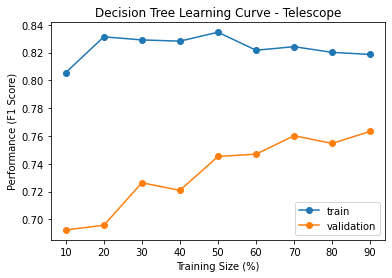

In [61]:
best_tree_classifier1 = DecisionTreeClassifier(**best_tree_params1, random_state=0)
tree_f1_1 = get_f1_score_vs_train_pct(X1_train, y1_train, best_tree_classifier1)
plot_learning_curve(tree_f1_1, model_type='Decision Tree', data_name=data1_name)

,f1_train,f1_val,train_pct
0,1.000000,0.483126,10
1,1.000000,0.498630,20
2,0.998084,0.501673,30
3,0.978765,0.520683,40
4,0.958937,0.542913,50
5,0.920181,0.542227,60
6,0.866827,0.542749,70
7,0.850856,0.574630,80
8,0.807768,0.576572,90


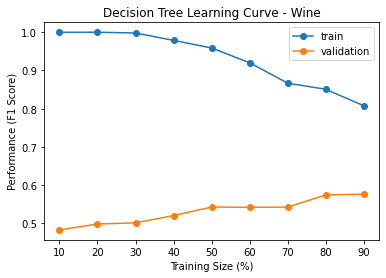

In [315]:
best_tree_classifier2 = DecisionTreeClassifier(**best_tree_params2, random_state=0)
tree_f1_2 = get_f1_score_vs_train_pct(X2_train, y2_train, best_tree_classifier2)
plot_learning_curve(tree_f1_2, model_type='Decision Tree', data_name=data2_name)

### time

In [73]:
def plot_time_100(X_train_train, y_train_train, classifier, model_type, data_name):
    train_pct_list=[]
    train_time_list=[]
    pred_time_list=[]
    for i in range(10):
        n=int(0.1*(i+1)*len(X_train_train))
        train_pct_list.append((i+1)*10)
        X_train_train_sample=X_train_train.sample(n,random_state=0)
        y_train_train_sample=y_train_train.loc[X_train_train_sample.index]
        t1=time.time()
        for j in range(100):
            classifier.fit(X_train_train_sample, y_train_train_sample)
        t2=time.time()
        for j in range(100):
            classifier.predict(X_train_train_sample)
        t3=time.time()
        train_time_list.append(round((t2-t1)/100, 6))
        pred_time_list.append(round((t3-t2)/100, 6))
    summary = pd.DataFrame({
        'train_time': train_time_list,
        'pred_time': pred_time_list,
        'train_pct': train_pct_list
    })  
    display(summary)
    plt.plot(train_pct_list, train_time_list, '-o', label='training time')
    plt.plot(train_pct_list, pred_time_list, '-*', label='predicting time')
    plt.xticks(train_pct_list)
    plt.xlabel('Training Size (%)')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.title(f'{model_type} Training vs Predicting Time - {data_name}')
    plt.show()

,train_time,pred_time,train_pct
0,0.000912,0.000386,10
1,0.000826,0.000384,20
2,0.000980,0.000388,30
3,0.001158,0.000389,40
4,0.001329,0.000391,50
5,0.001535,0.000404,60
6,0.001873,0.000416,70
7,0.002021,0.000401,80
8,0.002218,0.000402,90
9,0.002591,0.000404,100


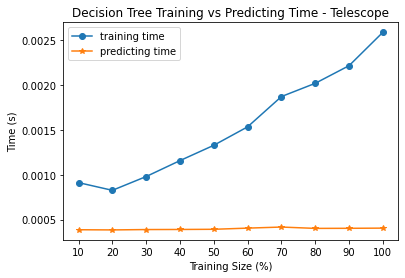

In [74]:
plot_time_100(X1_train_train, y1_train_train, best_tree_classifier1, model_type='Decision Tree', data_name=data1_name)

,train_time,pred_time,train_pct
0,0.001013,0.000394,10
1,0.001047,0.000392,20
2,0.001243,0.000395,30
3,0.001537,0.000398,40
4,0.001777,0.000400,50
5,0.002074,0.000404,60
6,0.002415,0.000408,70
7,0.002624,0.000403,80
8,0.002927,0.000408,90
9,0.003215,0.000414,100


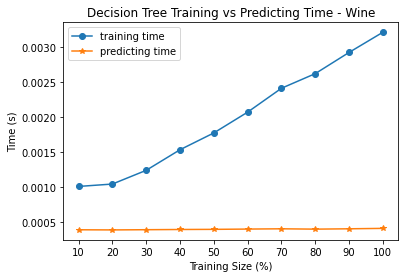

In [75]:
plot_time_100(X2_train_train, y2_train_train, best_tree_classifier2, model_type='Decision Tree', data_name=data2_name)

## test performance

In [93]:
def model_performance(X_train, y_train, X_test, y_test, classifier, model_type, data_name):
    start_t = time.time()
    classifier.fit(X_train, y_train)
    train_t = round(time.time() - start_t, 4)
    start_t = time.time()
    for i in range(100):
        pred_test = classifier.predict(X_test)
    pred_t = round((time.time() - start_t)/100, 4)
    pred_train = classifier.predict(X_train)
    print('Test performance:')
    print(classification_report(y_test, pred_test))
    cm = confusion_matrix(y_test, pred_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title(f'{model_type} - {data_name} - Test')
    plt.show()
    print('Train performance:')
    print(classification_report(y_train, pred_train))
    cm = confusion_matrix(y_train, pred_train, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title(f'{model_type} - {data_name} - Train')
    plt.show()
    print(f'Train time is {train_t} seconds.')
    print(f'Prediction time is {pred_t} seconds.')
    return train_t, pred_t

### data1

Test performance:
              precision    recall  f1-score   support

           g       0.75      0.86      0.80       153
           h       0.83      0.71      0.76       147

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.78       300
weighted avg       0.79      0.79      0.79       300



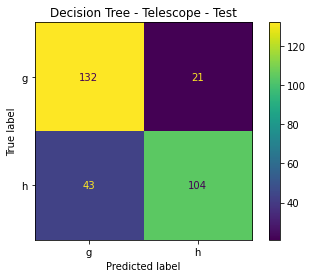

Train performance:
              precision    recall  f1-score   support

           g       0.76      0.91      0.83       357
           h       0.88      0.69      0.78       343

    accuracy                           0.80       700
   macro avg       0.82      0.80      0.80       700
weighted avg       0.82      0.80      0.80       700



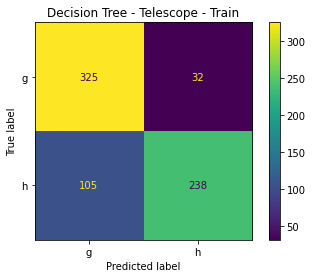

Train time is 0.0088 seconds.
Prediction time is 0.0005 seconds.


In [338]:
best_tree_classifier1 = DecisionTreeClassifier(random_state=0, **best_tree_params1)
tree_train_t1, tree_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, best_tree_classifier1, model_type='Decision Tree', 
                                                data_name=data1_name)

### data2

Test performance:
              precision    recall  f1-score   support

           5       0.65      0.74      0.69       120
           6       0.57      0.59      0.58       120
           7       0.74      0.47      0.57        60

    accuracy                           0.63       300
   macro avg       0.65      0.60      0.61       300
weighted avg       0.63      0.63      0.62       300



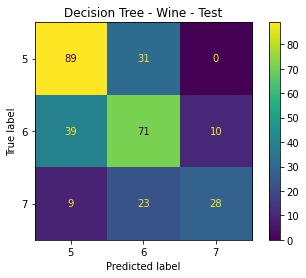

Train performance:
              precision    recall  f1-score   support

           5       0.81      0.87      0.84       280
           6       0.75      0.75      0.75       280
           7       0.82      0.69      0.75       139

    accuracy                           0.79       699
   macro avg       0.79      0.77      0.78       699
weighted avg       0.79      0.79      0.79       699



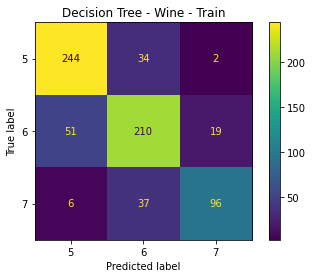

Train time is 0.0057 seconds.
Prediction time is 0.0005 seconds.


In [339]:
best_tree_classifier2 = DecisionTreeClassifier(random_state=0, **best_tree_params2)
tree_train_t2, tree_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, best_tree_classifier2, model_type='Decision Tree', 
                                                data_name=data2_name)

Test performance:
              precision    recall  f1-score   support

           5       0.67      0.65      0.66       120
           6       0.51      0.47      0.49       120
           7       0.51      0.63      0.56        60

    accuracy                           0.57       300
   macro avg       0.56      0.58      0.57       300
weighted avg       0.58      0.57      0.57       300



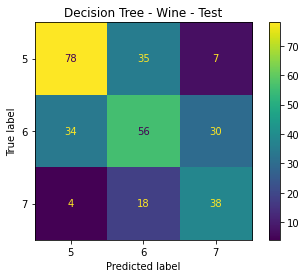

Train performance:
              precision    recall  f1-score   support

           5       0.78      0.74      0.76       280
           6       0.75      0.64      0.69       280
           7       0.66      0.93      0.77       139

    accuracy                           0.74       699
   macro avg       0.73      0.77      0.74       699
weighted avg       0.74      0.74      0.73       699



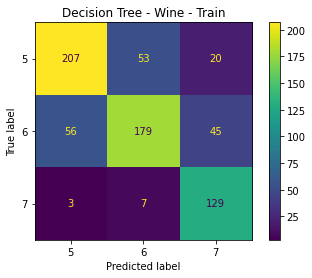

Train time is 0.0094 seconds.
Prediction time is 0.0006 seconds.


In [340]:
balanced_tree_classifier2 = DecisionTreeClassifier(random_state=0, class_weight='balanced', **best_tree_params2)
tree_train_t2, tree_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, balanced_tree_classifier2, model_type='Decision Tree', 
                                                data_name=data2_name)

# ANN

 ## tune hyper-parameter

### data1

/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda

Best classifier is MLPClassifier(alpha=0.005, hidden_layer_sizes=(20, 20), max_iter=1000,
              random_state=0) with f1 score 0.8252398246178133
{'alpha': 0.005, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001, 'max_iter': 1000}


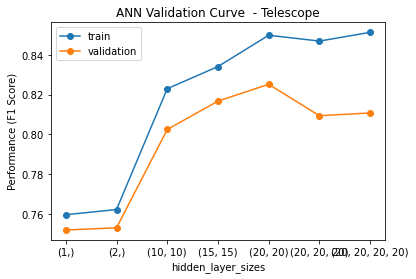

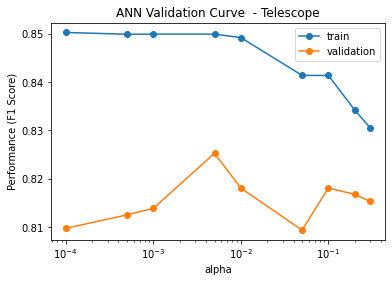

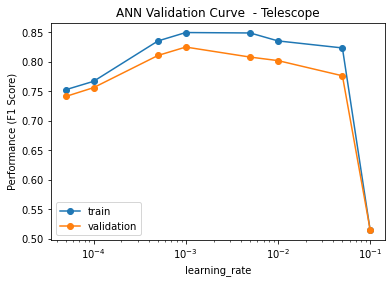

CPU times: user 10.8 s, sys: 2.41 s, total: 13.2 s
Wall time: 2min 29s


In [385]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(1,), (2,), (10,10), (15,15), (20,20), (20,20,20), (20,20,20,20)],
    'alpha': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'learning_rate_init': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    # 'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
    'max_iter': [1000]
}
best_ann_params1, ann_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
model_type = 'ANN'
print(best_ann_params1)
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'alpha'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name,
                     log_x=True)
hyper = 'learning_rate_init'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name,
                     hyper_name='learning_rate', log_x=True)
# hyper = 'max_iter'
# plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
# hyper = 'tol'
# plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name,
#                      log_x=True)

/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda

Best classifier is MLPClassifier(alpha=0.005, hidden_layer_sizes=(20, 20), max_iter=1000,
              random_state=0) with f1 score 0.8252398246178133
{'alpha': 0.005, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001, 'max_iter': 1000}


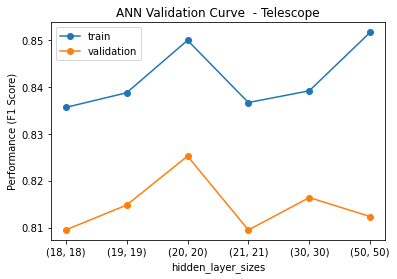

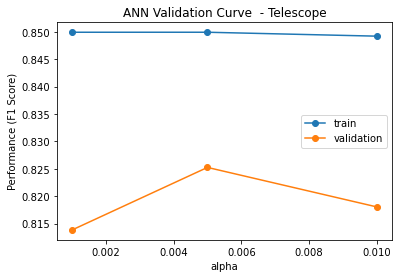

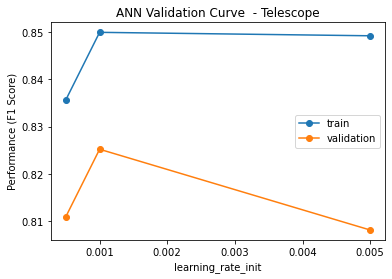

CPU times: user 7.75 s, sys: 2.2 s, total: 9.95 s
Wall time: 32.9 s


In [387]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(18,18),(19,19), (20,20),(21,21), (30,30), (50,50)],
    'alpha': [0.01, 0.005, 0.001],
    'learning_rate_init': [0.005, 0.001, 0.0005],
    # 'tol': [2.5e-4, 2e-4, 1.5e-4, 1e-4, 5e-5, 1e-5],
    'max_iter': [1000]
}
best_ann_params1, ann_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
model_type = 'ANN' 
print(best_ann_params1)
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'alpha'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'learning_rate_init'
plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
# hyper = 'max_iter'
# plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)
# hyper = 'tol'
# plot_validation_curve(hyper, params=best_ann_params1, cv_result=ann_cv_result1, model_type=model_type, data_name=data1_name)

/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best classifier is MLPClassifier(alpha=0.005, hidden_layer_sizes=(20, 20), max_iter=1000,
              random_state=0) with f1 score 0.8252398246178133
{'alpha': 0.005, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001, 'max_iter': 1000}


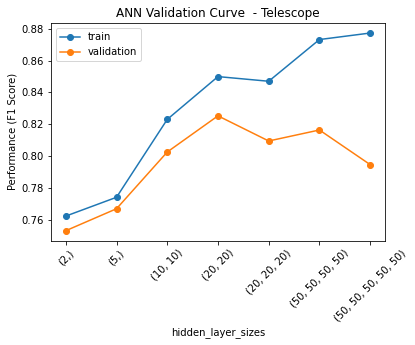

CPU times: user 7.62 s, sys: 2.13 s, total: 9.75 s
Wall time: 7.19 s


In [383]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(2,), (5,), (10,10), (20,20), (20,20,20), (50,50,50,50), (50,50,50,50,50)],
    'alpha': [0.005],
    'learning_rate_init': [0.001],
    'max_iter': [1000]
}
params1, cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
model_type = 'ANN'
print(params1)
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=params1, cv_result=cv_result1, model_type=model_type, data_name=data1_name, rot_x=True)

### data2

/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yang/opt/anaconda

Best classifier is MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=1000, random_state=0) with f1 score 0.6180517239259974
{'alpha': 0.01, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01, 'max_iter': 1000}


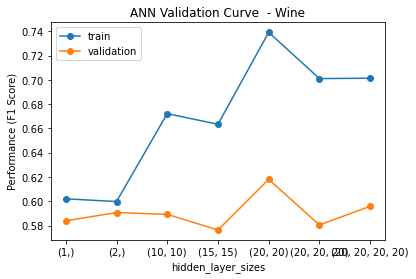

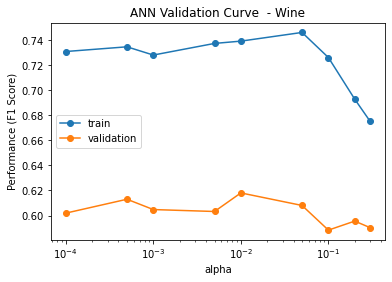

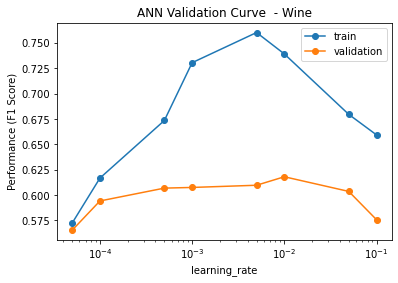

CPU times: user 8.75 s, sys: 1.74 s, total: 10.5 s
Wall time: 3min 12s


In [399]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(1,), (2,), (10,10), (15,15), (20,20), (20,20,20), (20,20,20,20)],
    'alpha': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'learning_rate_init': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    # 'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
    'max_iter': [1000]
}
best_ann_params2, ann_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_ann_params2)
model_type = 'ANN' 
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'alpha'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name,
                     log_x=True)
hyper = 'learning_rate_init'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name,
                     hyper_name='learning_rate', log_x=True)


Best classifier is MLPClassifier(alpha=0.012, hidden_layer_sizes=(20, 20),
              learning_rate_init=0.006, max_iter=1000, random_state=0) with f1 score 0.6242423918334964
{'alpha': 0.012, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.006, 'max_iter': 1000}


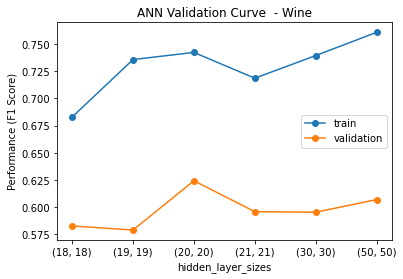

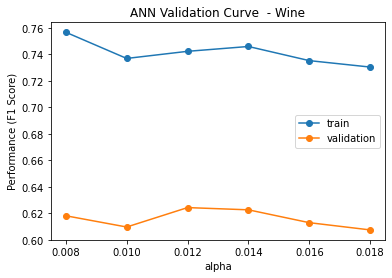

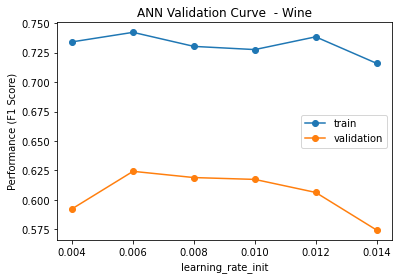

CPU times: user 5.37 s, sys: 1.33 s, total: 6.7 s
Wall time: 48.4 s


In [401]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(18,18),(19,19), (20,20),(21,21), (30,30), (50,50)],
    'alpha': [0.018, 0.016, 0.014, 0.012, 0.01, 0.008],
    'learning_rate_init': [0.014, 0.012, 0.01, 0.008, 0.006, 0.004],
    # 'tol': [1e-4, 8e-5, 6e-5, 5e-5, 1e-5, 1e-6],
    'max_iter': [1000]
}
best_ann_params2, ann_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_ann_params2)
model_type = 'ANN' 
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'alpha'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'learning_rate_init'
plot_validation_curve(hyper, params=best_ann_params2, cv_result=ann_cv_result2, model_type=model_type, data_name=data2_name)

Best classifier is MLPClassifier(alpha=0.012, hidden_layer_sizes=(20, 20),
              learning_rate_init=0.006, max_iter=1000, random_state=0) with f1 score 0.6242423918334964
{'alpha': 0.012, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.006, 'max_iter': 1000}


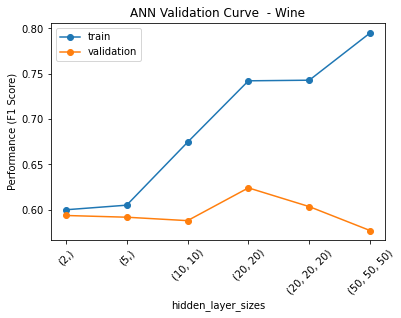

CPU times: user 3.31 s, sys: 1.07 s, total: 4.38 s
Wall time: 3.61 s


In [418]:
%%time
classifier = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(2,), (5,), (10,10), (20,20), (20,20,20), (50,50,50)],
    'alpha': [0.012],
    'learning_rate_init': [0.006],
    'max_iter': [1000]
}
params2, cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
model_type = 'ANN'
print(params2)
hyper = 'hidden_layer_sizes'
plot_validation_curve(hyper, params=params2, cv_result=cv_result2, model_type=model_type, data_name=data2_name, rot_x=True)

## learning curve

### train percentage

,f1_train,f1_val,train_pct
0,0.947102,0.743976,10
1,0.916386,0.770704,20
2,0.772170,0.756023,30
3,0.864213,0.798563,40
4,0.857632,0.805804,50
5,0.824241,0.793427,60
6,0.852650,0.812501,70
7,0.855802,0.822733,80
8,0.830124,0.812495,90


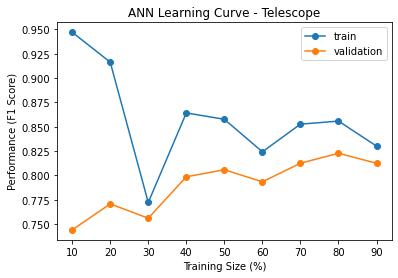

In [388]:
best_ann_classifier1 = MLPClassifier(**best_ann_params1, random_state=0)
ann_f1_1 = get_f1_score_vs_train_pct(X1_train, y1_train, best_ann_classifier1)
plot_learning_curve(ann_f1_1, model_type='ANN', data_name=data1_name)

,f1_train,f1_val,train_pct
0,1.000000,0.528622,10
1,0.992784,0.546295,20
2,0.643409,0.590581,30
3,0.776776,0.587948,40
4,0.765737,0.594038,50
5,0.664847,0.600322,60
6,0.735526,0.594578,70
7,0.747034,0.608698,80
8,0.689750,0.617938,90


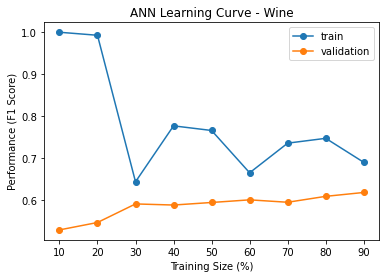

In [417]:
best_ann_classifier2 = MLPClassifier(**best_ann_params2, random_state=0)
ann_f1_2 = get_f1_score_vs_train_pct(X2_train, y2_train, best_ann_classifier2)
plot_learning_curve(ann_f1_2, model_type='ANN', data_name=data2_name)

### iteration

In [156]:
def get_f1_score_vs_iteration(X_train_train, y_train_train, X_val, y_val, params, iter_list):
    f1_train_train_list=[]
    f1_val_list=[]
    for i in iter_list:
        classifier = MLPClassifier(**params, max_iter=i, random_state=0)
        classifier.fit(X_train_train, y_train_train)
        pred_train_train = classifier.predict(X_train_train)
        f1_train_train=f1_score(y_train_train, pred_train_train, average="weighted")
        pred_val = classifier.predict(X_val)
        f1_val=f1_score(y_val, pred_val, average="weighted")
        f1_train_train_list.append(f1_train_train)
        f1_val_list.append(f1_val)
    summary = pd.DataFrame({
        'f1_train': f1_train_train_list,
        'f1_val': f1_val_list,
        'iteration': iter_list
    })   
    display(summary)
    return (f1_train_train_list, f1_val_list, iter_list)

In [157]:
def plot_learning_curve_iter(f1, model_type, data_name):
    plt.plot(f1[2], f1[0], '-o', label='train')
    plt.plot(f1[2], f1[1], '-o', label='validation')
    plt.xticks(f1[2])
    plt.xlabel('Iteration')
    plt.ylabel('Performance (F1 Score)')
    plt.title(f'{model_type} Learning Curve on Iteration - {data_name}')
    plt.legend()
    plt.show()

,f1_train,f1_val,iteration
0,0.355452,0.368727,1
1,0.632143,0.610946,6
2,0.658634,0.669407,11
3,0.735691,0.698769,16
4,0.743551,0.666519,21
5,0.747014,0.666519,26
6,0.746604,0.679821,31
7,0.750724,0.681019,36
8,0.752458,0.687701,41
9,0.752458,0.687701,46


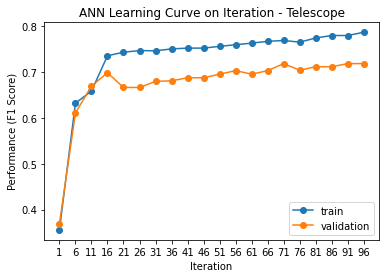

In [389]:
params1 = deepcopy(best_ann_params1)
del params1['max_iter']
ann_iter_f1_1 = get_f1_score_vs_iteration(X1_train_train, y1_train_train, X1_val, y1_val, params=params1, iter_list=list(range(1,100,5)))
plot_learning_curve_iter(ann_iter_f1_1, model_type='ANN', data_name=data1_name)

,f1_train,f1_val,iteration
0,0.593404,0.484804,10
1,0.623460,0.487148,15
2,0.637995,0.532788,20
3,0.642152,0.471616,25
4,0.653018,0.507217,30
5,0.658190,0.486967,35
6,0.654045,0.502407,40
7,0.657604,0.500843,45
8,0.658128,0.515867,50
9,0.654872,0.521751,55


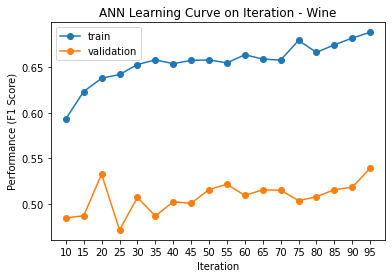

In [419]:
params2 = deepcopy(best_ann_params2)
del params2['max_iter']
ann_iter_f1_2 = get_f1_score_vs_iteration(X2_train_train, y2_train_train, X2_val, y2_val, params=params2, iter_list=list(range(10,100,5)))
plot_learning_curve_iter(ann_iter_f1_2, model_type='ANN', data_name=data2_name)

### time

In [168]:
def plot_time_30(X_train_train, y_train_train, classifier, model_type, data_name):
    train_pct_list=[]
    train_time_list=[]
    pred_time_list=[]
    for i in range(10):
        n=int(0.1*(i+1)*len(X_train_train))
        train_pct_list.append((i+1)*10)
        X_train_train_sample=X_train_train.sample(n,random_state=0)
        y_train_train_sample=y_train_train.loc[X_train_train_sample.index]
        t1=time.time()
        for j in range(30):
            classifier.fit(X_train_train_sample, y_train_train_sample)
        t2=time.time()
        for j in range(30):
            classifier.predict(X_train_train_sample)
        t3=time.time()
        train_time_list.append(round((t2-t1)/30, 6))
        pred_time_list.append(round((t3-t2)/30, 6))
    summary = pd.DataFrame({
        'train_time': train_time_list,
        'pred_time': pred_time_list,
        'train_pct': train_pct_list
    })  
    display(summary)
    plt.plot(train_pct_list, train_time_list, '-o', label='training time')
    plt.plot(train_pct_list, pred_time_list, '-*', label='predicting time')
    plt.xticks(train_pct_list)
    plt.xlabel('Training Size (%)')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.title(f'{model_type} Training vs Predicting Time - {data_name}')
    plt.show()

,train_time,pred_time,train_pct
0,0.245057,0.000427,10
1,0.629406,0.000555,20
2,0.757449,0.000571,30
3,0.177005,0.000777,40
4,1.051000,0.000902,50
5,1.525365,0.000770,60
6,1.527786,0.000735,70
7,1.126576,0.000931,80
8,1.863039,0.000741,90
9,2.235404,0.000742,100


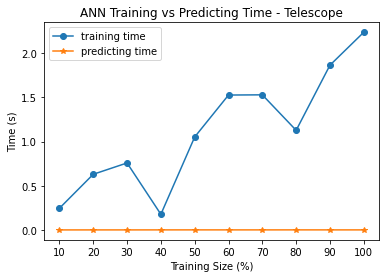

CPU times: user 20min 15s, sys: 5min 48s, total: 26min 4s
Wall time: 5min 34s


In [397]:
%%time
plot_time_30(X1_train_train, y1_train_train, best_ann_classifier1, model_type='ANN', data_name=data1_name)

,train_time,pred_time,train_pct
0,0.131570,0.000446,10
1,0.561194,0.000628,20
2,0.911649,0.000678,30
3,0.225249,0.000764,40
4,0.425126,0.000744,50
5,0.629622,0.000943,60
6,0.767667,0.000888,70
7,0.942764,0.000993,80
8,0.729965,0.000897,90
9,0.770900,0.000950,100


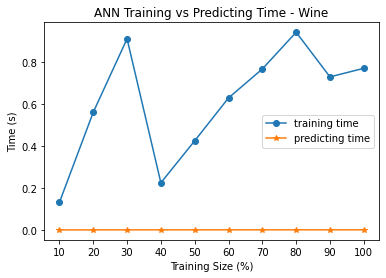

CPU times: user 10min 24s, sys: 3min 3s, total: 13min 27s
Wall time: 3min 3s


In [420]:
%%time
plot_time_30(X2_train_train, y2_train_train, best_ann_classifier2, model_type='ANN', data_name=data2_name)

### loss vs iteration

In [432]:
def get_loss_per_iter(X_train_train, y_train_train, X_val, y_val, params):
    loss_train_train_list = []
    loss_val_list = []
    iter_list = []
    classifier = MLPClassifier(**params, warm_start=True, max_iter=5, random_state=0)
    for i in range(0,100,5):
        classifier.fit(X_train_train.values, y_train_train.values)
        pred_train_train = classifier.predict_proba(X_train_train.values)
        loss_train_train = log_loss(y_train_train, pred_train_train)
        loss_train_train_list.append(loss_train_train)
        pred_val = classifier.predict_proba(X_val.values)
        loss_val = log_loss(y_val, pred_val)
        loss_val_list.append(loss_val)
        iter_list.append(i)
    return loss_train_train_list, loss_val_list, iter_list

In [186]:
def plot_learning_curve_loss_iter(loss, model_type, data_name):
    plt.plot(loss[2], loss[0], '-o', label='train')
    plt.plot(loss[2], loss[1], '-o', label='validation')
    tick_step = 50
    plt.xticks(range(min(loss[2]), max(loss[2])+tick_step, tick_step))
    plt.xlabel('Iteration')
    plt.ylabel('Loss (Cross-Entropy)')
    plt.title(f'{model_type} Learning Curve Loss vs. Iteration - {data_name}')
    plt.legend()
    plt.show()

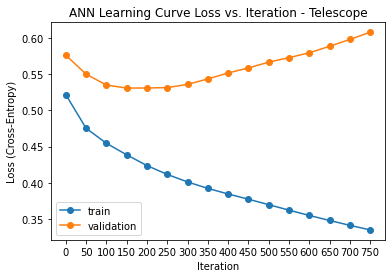

In [396]:
params1 = deepcopy(best_ann_params1)
del params1['max_iter']
loss1 = get_loss_per_iter(X1_train_train, y1_train_train, X1_val, y1_val, params1)
plot_learning_curve_loss_iter(loss1, model_type='ANN', data_name=data1_name)


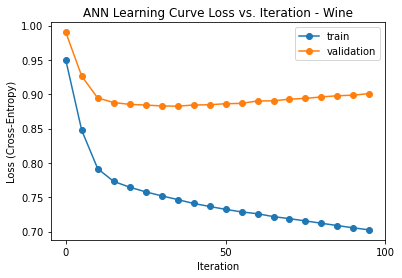

In [437]:
params = deepcopy(best_ann_params2)
del params['max_iter']
# params['learning_rate_init'] = 0.01
loss2 = get_loss_per_iter(X2_train_train, y2_train_train, X2_val, y2_val, params)
plot_learning_curve_loss_iter(loss2, model_type='ANN', data_name=data2_name)


## test performance

### data1

Test performance:
              precision    recall  f1-score   support

           g       0.87      0.86      0.87       153
           h       0.86      0.87      0.86       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



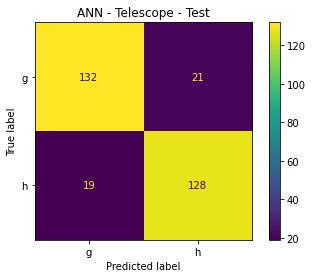

Train performance:
              precision    recall  f1-score   support

           g       0.85      0.85      0.85       357
           h       0.84      0.84      0.84       343

    accuracy                           0.85       700
   macro avg       0.85      0.85      0.85       700
weighted avg       0.85      0.85      0.85       700



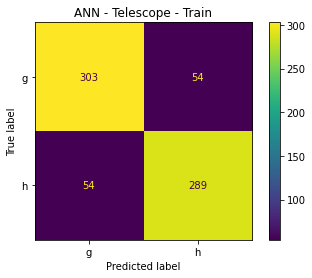

Train time is 1.7656 seconds.
Prediction time is 0.0007 seconds.


In [398]:
best_ann_classifier1 = MLPClassifier(**best_ann_params1, random_state=0)
ann_train_t1, ann_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, best_ann_classifier1, model_type='ANN', 
                                                data_name=data1_name)

### data2

Test performance:
              precision    recall  f1-score   support

           5       0.68      0.72      0.70       120
           6       0.56      0.57      0.57       120
           7       0.66      0.55      0.60        60

    accuracy                           0.63       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.63      0.63      0.63       300



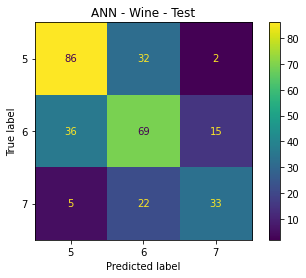

Train performance:
              precision    recall  f1-score   support

           5       0.75      0.80      0.78       280
           6       0.67      0.66      0.66       280
           7       0.74      0.68      0.71       139

    accuracy                           0.72       699
   macro avg       0.72      0.71      0.72       699
weighted avg       0.72      0.72      0.72       699



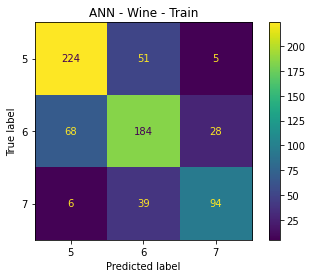

Train time is 0.7967 seconds.
Prediction time is 0.001 seconds.


In [438]:
best_ann_classifier2 = MLPClassifier(**best_ann_params2, random_state=0)
ann_train_t2, ann_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, best_ann_classifier2, model_type='ANN', 
                                                data_name=data2_name)

# SVM

## tune hyper-parameter

### data1

Best classifier is SVC(C=10000, gamma='auto', kernel='poly', random_state=0, tol=0.05) with f1 score 0.8191853582957196
{'C': 10000, 'kernel': 'poly', 'tol': 0.05}


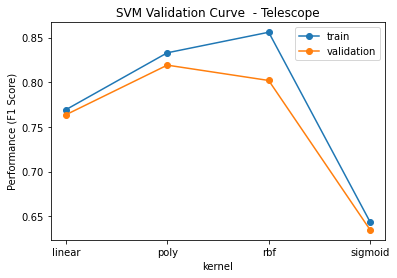

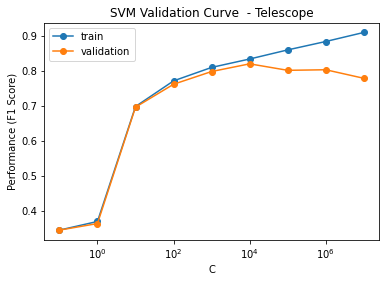

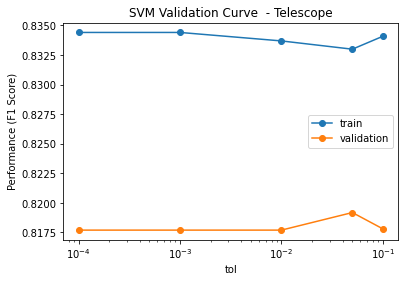

CPU times: user 1.6 s, sys: 121 ms, total: 1.72 s
Wall time: 6min 19s


In [503]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7],
    'tol': [0.1, 0.05, 0.01, 0.001, 0.0001]
}
best_svm_params1, svm_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_svm_params1)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'C'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)
hyper = 'tol'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)

Best classifier is SVC(C=11000, gamma='auto', kernel='poly', random_state=0, tol=0.06) with f1 score 0.8208046414357512
{'C': 11000, 'kernel': 'poly', 'tol': 0.06}


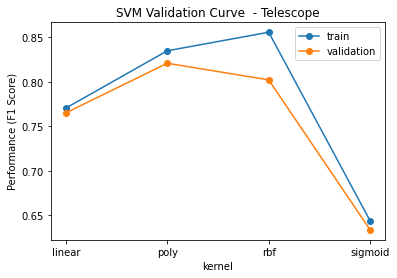

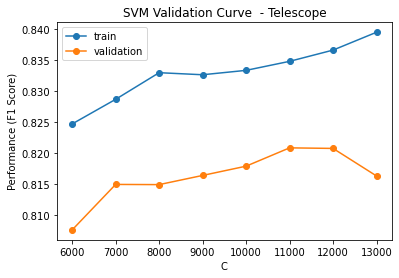

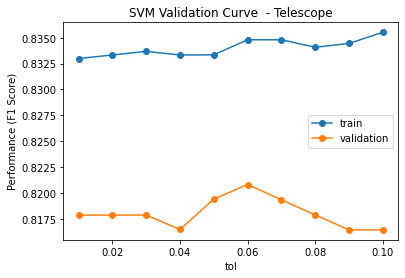

CPU times: user 1.47 s, sys: 81.2 ms, total: 1.55 s
Wall time: 17.5 s


In [505]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [6000, 7000,8000,9000,10000,11000,12000,13000],
    'tol': [0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01]
}
best_svm_params1, svm_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_svm_params1)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'C'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'tol'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name)

Best classifier is SVC(C=10000, gamma='auto', kernel='poly', random_state=0, tol=0.05) with f1 score 0.8191853582957196
{'C': 10000, 'degree': 3, 'kernel': 'poly', 'tol': 0.05}


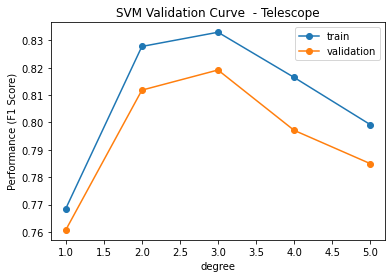

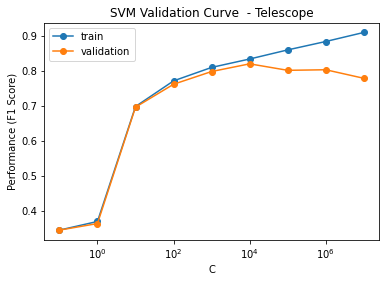

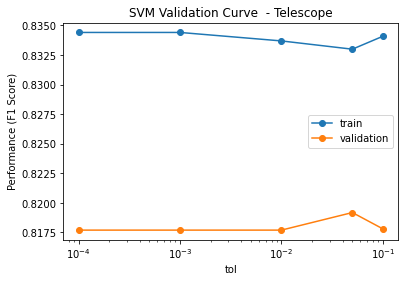

CPU times: user 1.26 s, sys: 78.4 ms, total: 1.34 s
Wall time: 3min 15s


In [524]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['poly'],
    'degree': [1,2,3,4,5],
    'C' : [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7],
    'tol': [0.1, 0.05, 0.01, 0.001, 0.0001]
}
best_svm_params1, svm_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_svm_params1)
model_type = 'SVM'
hyper = 'degree'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'C'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)
hyper = 'tol'
plot_validation_curve(hyper, params=best_svm_params1, cv_result=svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)

### data2

Best classifier is SVC(C=1000000.0, gamma='auto', kernel='poly', random_state=0, tol=0.1) with f1 score 0.6231265165475951
{'C': 1000000.0, 'kernel': 'poly', 'tol': 0.1}


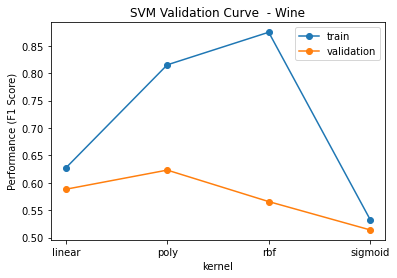

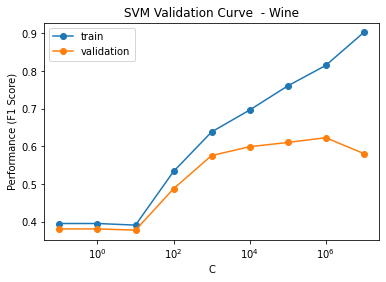

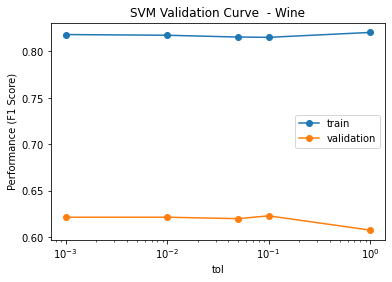

CPU times: user 1.71 s, sys: 229 ms, total: 1.94 s
Wall time: 12min 41s


In [519]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7],
    'tol': [1, 0.1, 0.05, 0.01, 0.001]
}
best_svm_params2, svm_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_svm_params2)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'C'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)
hyper = 'tol'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)

Best classifier is SVC(C=1000000.0, gamma='auto', kernel='poly', random_state=0, tol=0.3) with f1 score 0.6257271567092395
{'C': 1000000.0, 'kernel': 'poly', 'tol': 0.3}


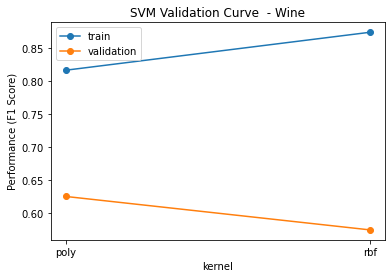

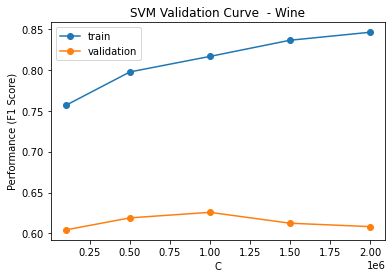

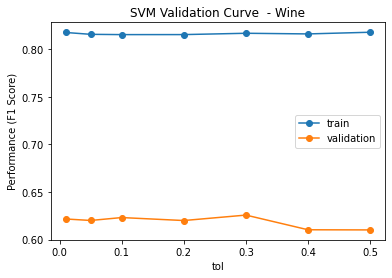

CPU times: user 958 ms, sys: 62.4 ms, total: 1.02 s
Wall time: 1min 8s


In [529]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['poly', 'rbf'],
    'C' : [1e5, 5e5, 1e6, 1.5e6, 2e6],
    'tol': [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
}
best_svm_params2, svm_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_svm_params2)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'C'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'tol'
plot_validation_curve(hyper, params=best_svm_params2, cv_result=svm_cv_result2, model_type=model_type, data_name=data2_name)

### turn off cv

#### data1

In [199]:
def tune_hyper_wo_cv(X_train, y_train, classifier, param_grid):
    X_train_train, X_val, y_train_train, y_val = train_test_split(range(len(X_train)), range(len(y_train)), test_size=0.2, random_state=4, stratify=y_train)
    split=[(y_train_train, y_val)]
    search_f1 = GridSearchCV(classifier, param_grid, cv=split, scoring='f1_weighted', return_train_score=True, n_jobs=-1)
    search_f1.fit(X_train.values, y_train.values)
    best_classifier = search_f1.best_estimator_
    best_f1 = search_f1.best_score_
    best_params = search_f1.best_params_
    cv_result = pd.DataFrame(search_f1.cv_results_)
    print(f'Best classifier is {best_classifier} with f1 score {best_f1}')
    return best_params, cv_result

Best classifier is SVC(C=10000000.0, gamma='auto', random_state=0) with f1 score 0.8071133246315729
{'C': 10000000.0, 'kernel': 'rbf', 'tol': 0.001}


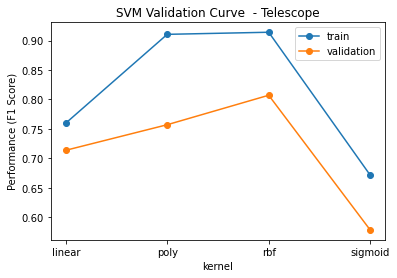

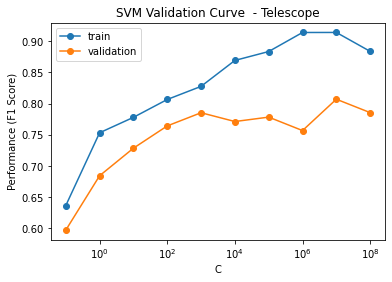

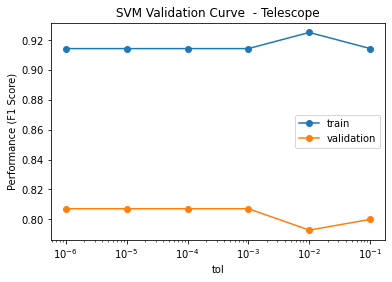

CPU times: user 38.9 s, sys: 211 ms, total: 39.1 s
Wall time: 5min 21s


In [539]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7, 1e8],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001, 1e-6]
}
one_svm_params1, one_svm_cv_result1 = tune_hyper_wo_cv(X1_train, y1_train, classifier, param_grid)
print(one_svm_params1)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'C'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)
hyper = 'tol'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)

Best classifier is SVC(C=60000000.0, gamma='auto', random_state=0, tol=2) with f1 score 0.835722668066155
{'C': 60000000.0, 'kernel': 'rbf', 'tol': 2}


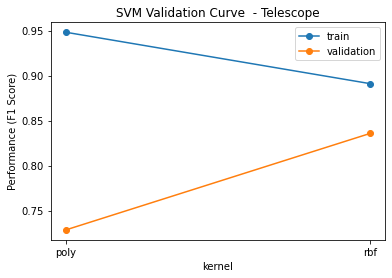

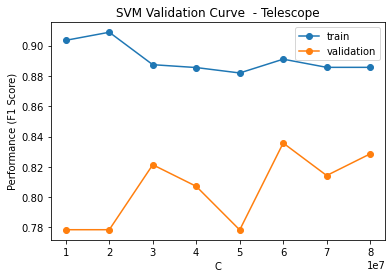

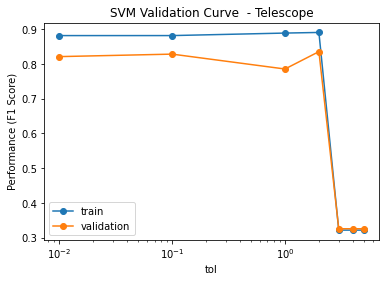

CPU times: user 10 s, sys: 48.7 ms, total: 10.1 s
Wall time: 2min 23s


In [549]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['poly', 'rbf'],
    'C' : [1e7, 2e7, 3e7, 4e7,5e7, 6e7, 7e7, 8e7],
    'tol': [5,4,3,2,1, 0.1, 0.01]
}
one_svm_params1, one_svm_cv_result1 = tune_hyper_wo_cv(X1_train, y1_train, classifier, param_grid)
print(one_svm_params1)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'C'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'tol'
plot_validation_curve(hyper, params=one_svm_params1, cv_result=one_svm_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)

#### data2

{'C': 100, 'kernel': 'rbf', 'tol': 0.01}


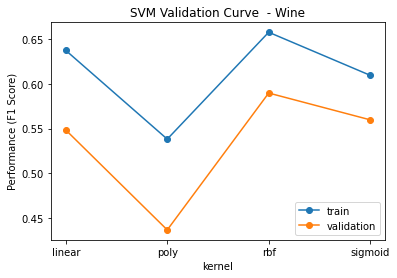

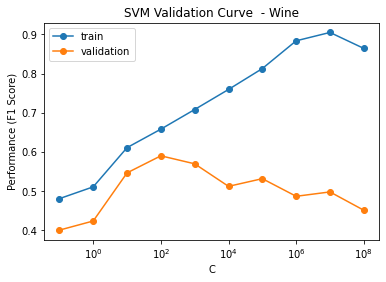

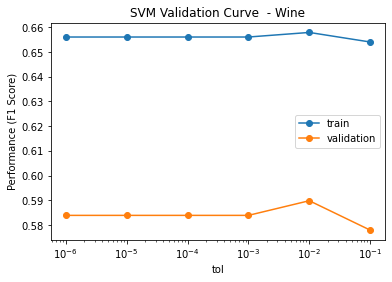

CPU times: user 576 ms, sys: 27.7 ms, total: 604 ms
Wall time: 600 ms


In [551]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6, 1e7, 1e8],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001, 1e-6]
}
# one_svm_params2, one_svm_cv_result2 = tune_hyper_wo_cv(X2_train, y2_train, classifier, param_grid)
print(one_svm_params2)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'C'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)
hyper = 'tol'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)

Best classifier is SVC(C=250, gamma='auto', random_state=0, tol=0.04) with f1 score 0.6023030303030305
{'C': 250, 'kernel': 'rbf', 'tol': 0.04}


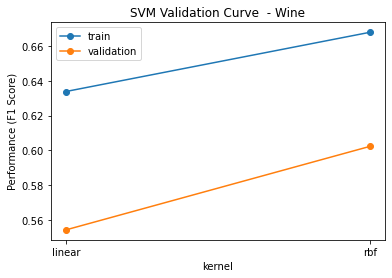

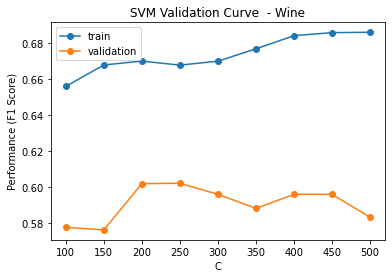

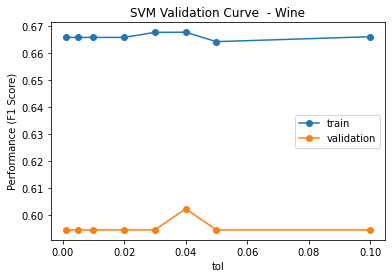

CPU times: user 461 ms, sys: 29.3 ms, total: 490 ms
Wall time: 1.61 s


In [555]:
%%time
classifier = SVC(gamma='auto', random_state=0)
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C' : [100,150, 200,250,300,350,400,450,500],
    'tol': [0.1,0.05, 0.04, 0.03, 0.02, 0.01, 0.005, 0.001]
}
one_svm_params2, one_svm_cv_result2 = tune_hyper_wo_cv(X2_train, y2_train, classifier, param_grid)
print(one_svm_params2)
model_type = 'SVM'
hyper = 'kernel'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'C'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'tol'
plot_validation_curve(hyper, params=one_svm_params2, cv_result=one_svm_cv_result2, model_type=model_type, data_name=data2_name)

## learning curve

### train percentage

,f1_train,f1_val,train_pct
0,0.888032,0.763165,10
1,0.871128,0.774439,20
2,0.859090,0.785536,30
3,0.845294,0.797095,40
4,0.844858,0.797405,50
5,0.836356,0.801730,60
6,0.837941,0.806128,70
7,0.834567,0.816969,80
8,0.834424,0.826223,90


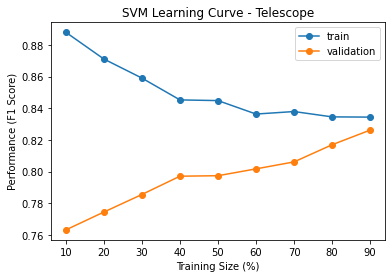

In [541]:
best_svm_classifier1 = SVC(**best_svm_params1, gamma='auto', random_state=0)
svm_f1_1 = get_f1_score_vs_train_pct(X1_train, y1_train, best_svm_classifier1)
plot_learning_curve(svm_f1_1, model_type='SVM', data_name=data1_name)

,f1_train,f1_val,train_pct
0,0.995650,0.497598,10
1,0.963318,0.516684,20
2,0.923792,0.535650,30
3,0.886816,0.540402,40
4,0.868593,0.565862,50
5,0.845229,0.579639,60
6,0.831809,0.586369,70
7,0.823307,0.591032,80
8,0.809571,0.628852,90


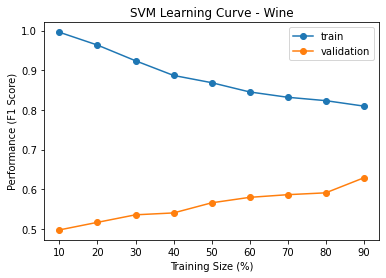

In [542]:
best_svm_classifier2 = SVC(**best_svm_params2, gamma='auto', random_state=0)
svm_f1_2 = get_f1_score_vs_train_pct(X2_train, y2_train, best_svm_classifier2)
plot_learning_curve(svm_f1_2, model_type='SVM', data_name=data2_name)

### time

,train_time,pred_time,train_pct
0,0.000934,0.000477,10
1,0.001030,0.000600,20
2,0.001502,0.000816,30
3,0.002250,0.001151,40
4,0.002906,0.001582,50
5,0.003973,0.001962,60
6,0.005153,0.002587,70
7,0.006347,0.003374,80
8,0.007620,0.004091,90
9,0.009408,0.004736,100


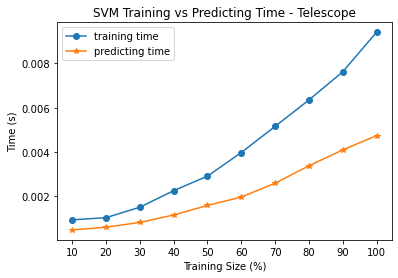

In [543]:
plot_time_100(X1_train_train, y1_train_train, best_svm_classifier1, model_type='SVM', data_name=data1_name)

,train_time,pred_time,train_pct
0,0.001133,0.000558,10
1,0.002701,0.000715,20
2,0.005264,0.001114,30
3,0.012010,0.001625,40
4,0.016389,0.002153,50
5,0.025040,0.002936,60
6,0.035560,0.003915,70
7,0.049167,0.004902,80
8,0.058978,0.006127,90
9,0.070396,0.007583,100


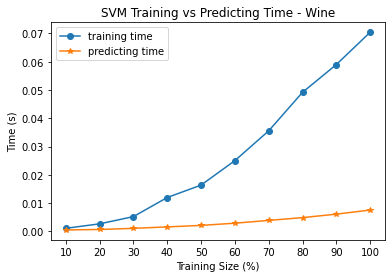

In [544]:
plot_time_100(X2_train_train, y2_train_train, best_svm_classifier2, model_type='SVM', data_name=data2_name)

## test performance

### data1

Test performance:
              precision    recall  f1-score   support

           g       0.80      0.90      0.85       153
           h       0.88      0.77      0.82       147

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



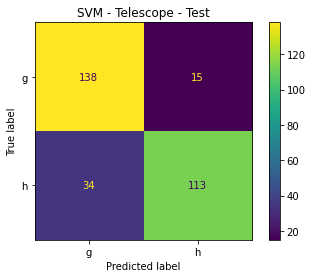

Train performance:
              precision    recall  f1-score   support

           g       0.81      0.89      0.85       357
           h       0.87      0.79      0.83       343

    accuracy                           0.84       700
   macro avg       0.84      0.84      0.84       700
weighted avg       0.84      0.84      0.84       700



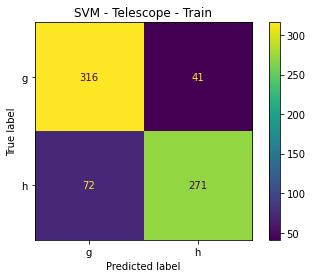

Train time is 0.0244 seconds.
Prediction time is 0.0035 seconds.


In [545]:
best_svm_classifier1 = SVC(random_state=0, gamma='auto', **best_svm_params1)
svm_train_t1, svm_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, best_svm_classifier1, model_type='SVM', 
                                                data_name=data1_name)

### data2

Test performance:
              precision    recall  f1-score   support

           5       0.65      0.73      0.69       120
           6       0.50      0.49      0.50       120
           7       0.60      0.47      0.52        60

    accuracy                           0.58       300
   macro avg       0.58      0.56      0.57       300
weighted avg       0.58      0.58      0.58       300



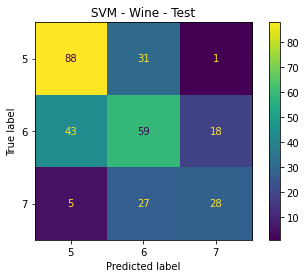

Train performance:
              precision    recall  f1-score   support

           5       0.78      0.90      0.83       280
           6       0.80      0.70      0.75       280
           7       0.87      0.81      0.84       139

    accuracy                           0.80       699
   macro avg       0.82      0.80      0.81       699
weighted avg       0.80      0.80      0.80       699



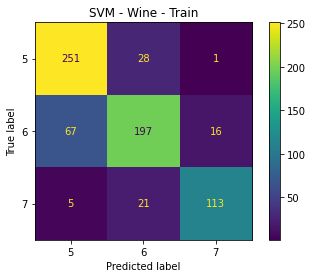

Train time is 0.1404 seconds.
Prediction time is 0.0052 seconds.


In [546]:
best_svm_classifier2 = SVC(random_state=0, gamma='auto', **best_svm_params2)
svm_train_t2, svm_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, best_svm_classifier2, model_type='SVM', 
                                                data_name=data2_name)

### turn off cv

#### data1

Test performance:
              precision    recall  f1-score   support

           g       0.82      0.83      0.82       153
           h       0.82      0.81      0.82       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



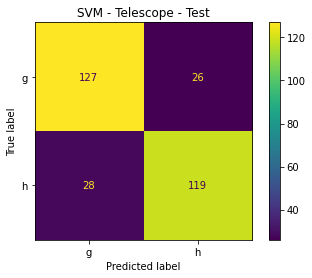

Train performance:
              precision    recall  f1-score   support

           g       0.86      0.88      0.87       357
           h       0.87      0.85      0.86       343

    accuracy                           0.86       700
   macro avg       0.86      0.86      0.86       700
weighted avg       0.86      0.86      0.86       700



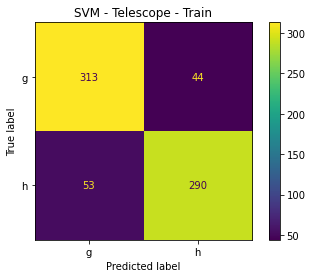

Train time is 9.2774 seconds.
Prediction time is 0.006 seconds.


In [556]:
one_svm_classifier1 = SVC(random_state=0, gamma='auto', **one_svm_params1)
one_svm_train_t1, one_svm_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, one_svm_classifier1, model_type='SVM', 
                                                data_name=data1_name)

#### data2

Test performance:
              precision    recall  f1-score   support

           5       0.67      0.77      0.72       120
           6       0.54      0.53      0.54       120
           7       0.59      0.43      0.50        60

    accuracy                           0.61       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.60      0.61      0.60       300



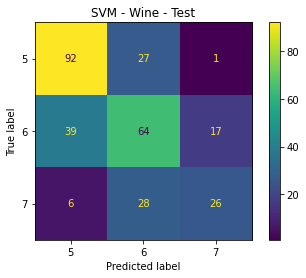

Train performance:
              precision    recall  f1-score   support

           5       0.70      0.79      0.74       280
           6       0.59      0.57      0.58       280
           7       0.67      0.52      0.58       139

    accuracy                           0.65       699
   macro avg       0.65      0.63      0.63       699
weighted avg       0.65      0.65      0.65       699



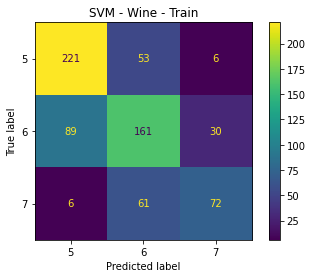

Train time is 0.0401 seconds.
Prediction time is 0.0168 seconds.


In [557]:
one_svm_classifier2 = SVC(random_state=0, gamma='auto', **one_svm_params2)
one_svm_train_t2, one_svm_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, one_svm_classifier2, model_type='SVM', 
                                                data_name=data2_name)

# AdaBoost

## tune hyper-parameter

### data1

Best classifier is AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0) with f1 score 0.7967779357547803
{'learning_rate': 0.1, 'n_estimators': 200}


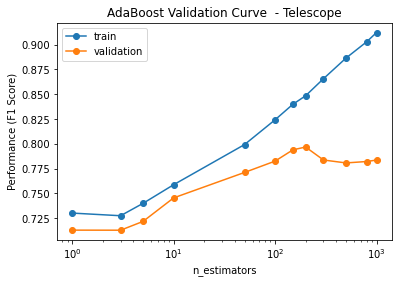

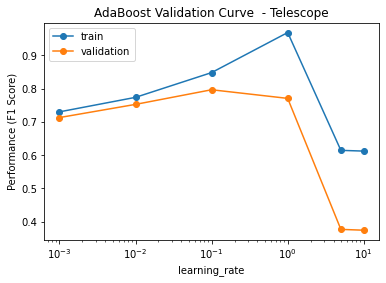

CPU times: user 1.32 s, sys: 196 ms, total: 1.51 s
Wall time: 22.9 s


In [484]:
%%time
classifier = AdaBoostClassifier(random_state=0)
base_estimators = [DecisionTreeClassifier(max_depth=1, random_state=0), 
                  DecisionTreeClassifier(max_depth=2, random_state=0),
                  DecisionTreeClassifier(max_depth=3, random_state=0)]
param_grid = {
    # 'base_estimator': base_estimators,
    'n_estimators': [1,3,5,10,50,100,150,200,300,500,800,1000],
    'learning_rate': [0.001, 0.01, 0.1, 1, 5, 10]
}
best_ada_params1, ada_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_ada_params1)
model_type = 'AdaBoost'
hyper = 'n_estimators'
plot_validation_curve(hyper, params=best_ada_params1, cv_result=ada_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)
hyper = 'learning_rate'
plot_validation_curve(hyper, params=best_ada_params1, cv_result=ada_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)


Best classifier is AdaBoostClassifier(learning_rate=0.09, n_estimators=240, random_state=0) with f1 score 0.8011203400695752
{'learning_rate': 0.09, 'n_estimators': 240}


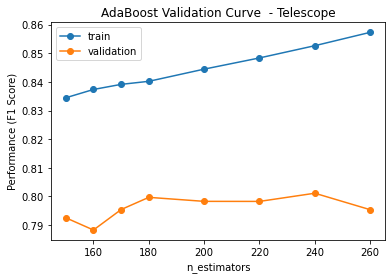

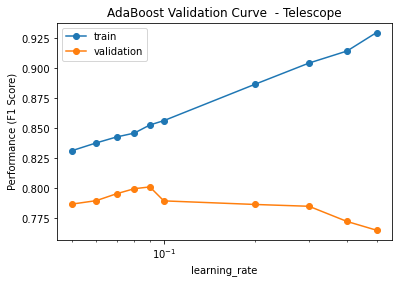

CPU times: user 1.23 s, sys: 82.4 ms, total: 1.31 s
Wall time: 19.3 s


In [488]:
%%time
classifier = AdaBoostClassifier(random_state=0)
param_grid = {
    'n_estimators': [150, 160, 170, 180,200,220,240,260,],
    'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
}
best_ada_params1, ada_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_ada_params1)
model_type = 'AdaBoost'
hyper = 'n_estimators'
plot_validation_curve(hyper, params=best_ada_params1, cv_result=ada_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'learning_rate'
plot_validation_curve(hyper, params=best_ada_params1, cv_result=ada_cv_result1, model_type=model_type, data_name=data1_name, log_x=True)


### data2

Best classifier is AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=0) with f1 score 0.5684876109098294
{'learning_rate': 0.1, 'n_estimators': 150}


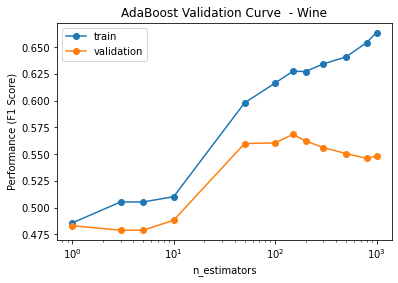

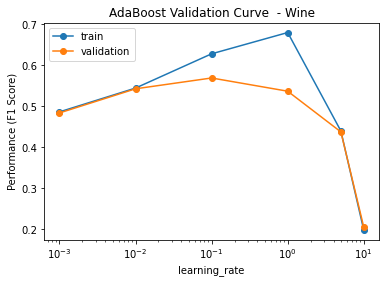

CPU times: user 1.01 s, sys: 48.7 ms, total: 1.06 s
Wall time: 20.3 s


In [482]:
%%time
classifier = AdaBoostClassifier(random_state=0)
# base_estimators = [
#                 # DecisionTreeClassifier(max_depth=5, random_state=0), 
#                   DecisionTreeClassifier(max_depth=6, random_state=0),
#                   # DecisionTreeClassifier(max_depth=7, random_state=0)
# ]
param_grid = {
    # 'base_estimator': base_estimators,
    'n_estimators': [1,3,5,10,50,100,150,200,300,500,800,1000],
    'learning_rate': [0.001, 0.01, 0.1, 1, 5, 10]
}
best_ada_params2, ada_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_ada_params2)
model_type = 'AdaBoost'
# hyper = 'base_estimator'
# plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'n_estimators'
plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)
hyper = 'learning_rate'
plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)


Best classifier is AdaBoostClassifier(learning_rate=0.1, n_estimators=170, random_state=0) with f1 score 0.5720387110962266
{'learning_rate': 0.1, 'n_estimators': 170}


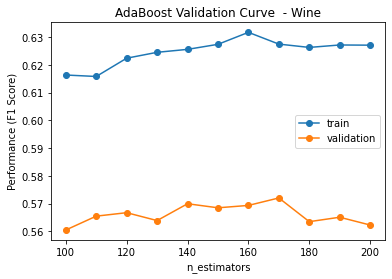

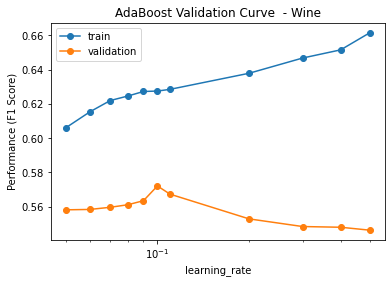

CPU times: user 1.07 s, sys: 71.8 ms, total: 1.14 s
Wall time: 20.1 s


In [490]:
%%time
classifier = AdaBoostClassifier(random_state=0)
# base_estimators = [DecisionTreeClassifier(max_depth=6, random_state=0),
#                   ]
param_grid = {
    # 'base_estimator': base_estimators,
    'n_estimators': [100,110, 120, 130, 140, 150, 160,170,180,190,200],
    'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11,0.2, 0.3, 0.4, 0.5]
}
best_ada_params2, ada_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_ada_params2)
model_type = 'AdaBoost'
# hyper = 'base_estimator'
# plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'n_estimators'
plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'learning_rate'
plot_validation_curve(hyper, params=best_ada_params2, cv_result=ada_cv_result2, model_type=model_type, data_name=data2_name, log_x=True)


## learning curve

### train percentage

,f1_train,f1_val,train_pct
0,0.998571,0.745791,10
1,0.958550,0.763237,20
2,0.921355,0.781600,30
3,0.887414,0.778271,40
4,0.873347,0.786551,50
5,0.869918,0.782814,60
6,0.855116,0.793597,70
7,0.852194,0.799118,80
8,0.850328,0.790977,90


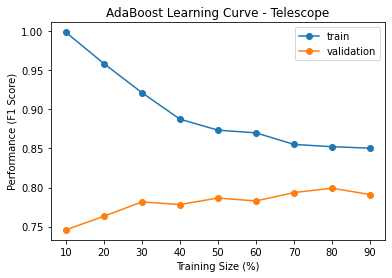

In [491]:
best_ada_classifier1 = AdaBoostClassifier(**best_ada_params1, random_state=0)
ada_f1_1 = get_f1_score_vs_train_pct(X1_train, y1_train, best_ada_classifier1)
plot_learning_curve(ada_f1_1, model_type='AdaBoost', data_name=data1_name)

,f1_train,f1_val,train_pct
0,0.750312,0.505166,10
1,0.704215,0.534120,20
2,0.651916,0.554972,30
3,0.644588,0.572360,40
4,0.629126,0.569222,50
5,0.632734,0.573620,60
6,0.627176,0.573079,70
7,0.613291,0.551339,80
8,0.613094,0.550290,90


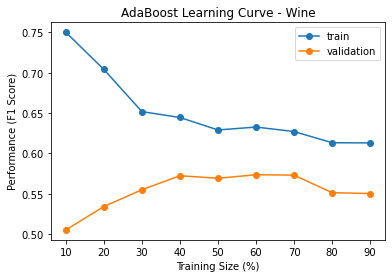

In [492]:
best_ada_classifier2 = AdaBoostClassifier(**best_ada_params2, random_state=0)
ada_f1_2 = get_f1_score_vs_train_pct(X2_train, y2_train, best_ada_classifier2)
plot_learning_curve(ada_f1_2, model_type='AdaBoost', data_name=data2_name)

### time 

,train_time,pred_time,train_pct
0,0.146826,0.014840,10
1,0.163247,0.015901,20
2,0.180850,0.016761,30
3,0.200747,0.017643,40
4,0.217300,0.018618,50
5,0.233371,0.019339,60
6,0.250407,0.019957,70
7,0.270279,0.020708,80
8,0.290599,0.021601,90
9,0.308257,0.022315,100


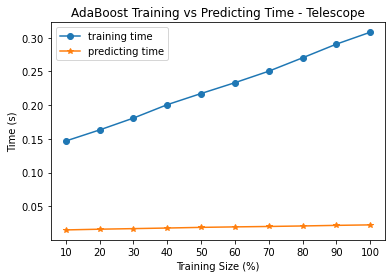

In [493]:
plot_time_100(X1_train_train, y1_train_train, best_ada_classifier1, model_type='AdaBoost', data_name=data1_name)

,train_time,pred_time,train_pct
0,0.105029,0.010880,10
1,0.114061,0.011531,20
2,0.125081,0.012581,30
3,0.134582,0.013239,40
4,0.145218,0.013912,50
5,0.155475,0.014615,60
6,0.164982,0.015071,70
7,0.174753,0.015597,80
8,0.184416,0.016367,90
9,0.196063,0.016996,100


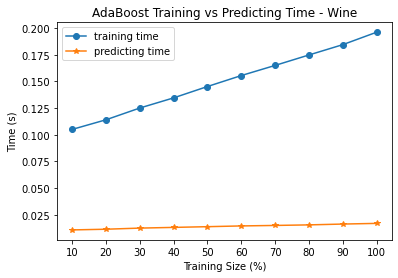

In [494]:
plot_time_100(X2_train_train, y2_train_train, best_ada_classifier2, model_type='AdaBoost', data_name=data2_name)

## test performance

### data1

Test performance:
              precision    recall  f1-score   support

           g       0.79      0.82      0.80       153
           h       0.80      0.78      0.79       147

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



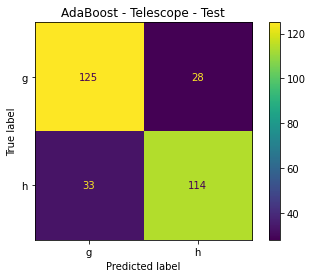

Train performance:
              precision    recall  f1-score   support

           g       0.83      0.87      0.85       357
           h       0.86      0.81      0.83       343

    accuracy                           0.84       700
   macro avg       0.84      0.84      0.84       700
weighted avg       0.84      0.84      0.84       700



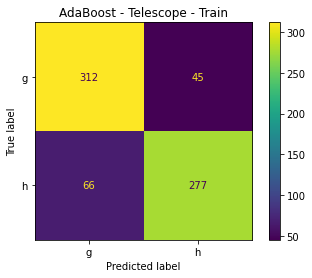

Train time is 0.383 seconds.
Prediction time is 0.0192 seconds.


In [495]:
best_ada_classifier1 = AdaBoostClassifier(random_state=0, **best_ada_params1)
ada_train_t1, ada_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, best_ada_classifier1, model_type='AdaBoost', 
                                                data_name=data1_name)

### data2

Test performance:
              precision    recall  f1-score   support

           5       0.69      0.78      0.73       120
           6       0.57      0.57      0.57       120
           7       0.59      0.45      0.51        60

    accuracy                           0.63       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.63      0.63      0.62       300



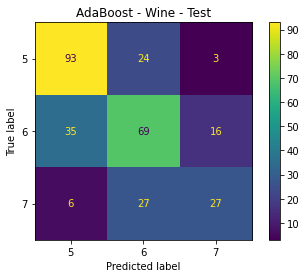

Train performance:
              precision    recall  f1-score   support

           5       0.69      0.72      0.71       280
           6       0.52      0.55      0.53       280
           7       0.63      0.49      0.55       139

    accuracy                           0.61       699
   macro avg       0.61      0.59      0.60       699
weighted avg       0.61      0.61      0.61       699



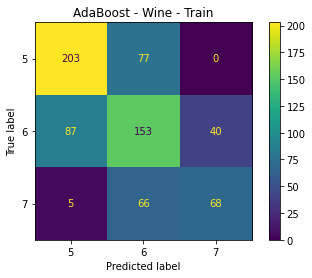

Train time is 0.247 seconds.
Prediction time is 0.0143 seconds.


In [496]:
best_ada_classifier2 = AdaBoostClassifier(random_state=0, **best_ada_params2)
ada_train_t2, ada_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, best_ada_classifier2, model_type='AdaBoost', 
                                                data_name=data2_name)

# KNN

## tune hyper-parameter

### data1

Best classifier is KNeighborsClassifier(n_neighbors=7, weights='distance') with f1 score 0.7613658808821028
{'n_neighbors': 7, 'weights': 'distance'}


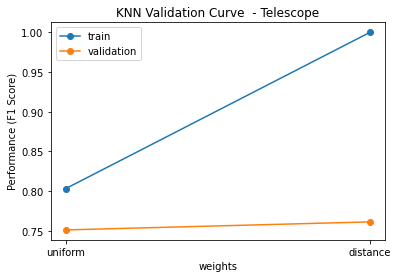

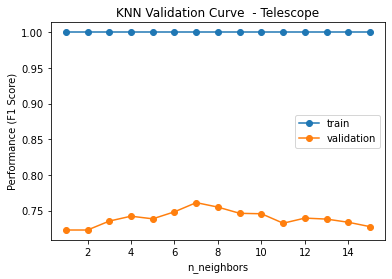

CPU times: user 342 ms, sys: 24 ms, total: 366 ms
Wall time: 611 ms


In [596]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'n_neighbors': range(1,16),
    # 'leaf_size': [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
}
best_knn_params1, knn_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(best_knn_params1)
model_type = 'KNN'
# hyper = 'algorithm'
# plot_validation_curve(hyper, params=best_knn_params1, cv_result=knn_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'weights'
plot_validation_curve(hyper, params=best_knn_params1, cv_result=knn_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=best_knn_params1, cv_result=knn_cv_result1, model_type=model_type, data_name=data1_name)
# hyper = 'leaf_size'
# plot_validation_curve(hyper, params=best_knn_params1, cv_result=knn_cv_result1, model_type=model_type, data_name=data1_name)

Best classifier is KNeighborsClassifier(n_neighbors=7) with f1 score 0.7512560381504299
{'n_neighbors': 7, 'weights': 'uniform'}


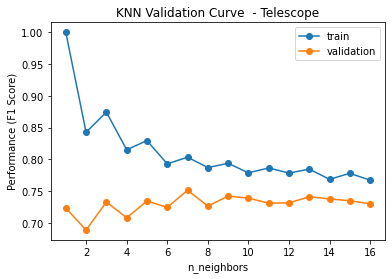

CPU times: user 185 ms, sys: 12.8 ms, total: 198 ms
Wall time: 427 ms


In [597]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform'],
    'n_neighbors': range(1,17),
    # 'leaf_size': [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
}
uni_knn_params1, uni_knn_cv_result1 = tune_hyper(X1_train, y1_train, classifier, param_grid)
print(uni_knn_params1)
model_type = 'KNN'
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=uni_knn_params1, cv_result=uni_knn_cv_result1, model_type=model_type, data_name=data1_name)

### data2

Best classifier is KNeighborsClassifier(n_neighbors=17, weights='distance') with f1 score 0.6438999230539555
{'n_neighbors': 17, 'weights': 'distance'}


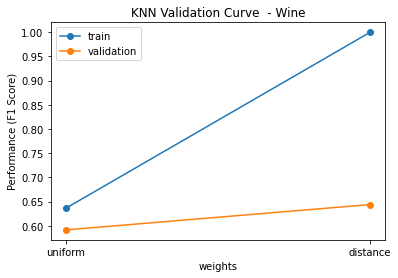

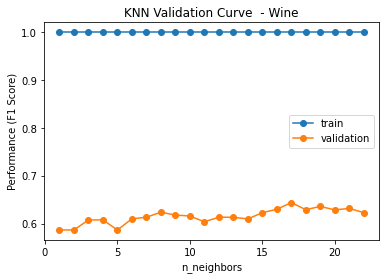

CPU times: user 376 ms, sys: 26.9 ms, total: 403 ms
Wall time: 788 ms


In [598]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'n_neighbors': range(1,23),
    # 'leaf_size': [10, 20, 25, 30, 35, 40, 50]
}
best_knn_params2, knn_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(best_knn_params2)
model_type = 'KNN'
# hyper = 'algorithm'
# plot_validation_curve(hyper, params=best_knn_params2, cv_result=knn_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'weights'
plot_validation_curve(hyper, params=best_knn_params2, cv_result=knn_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=best_knn_params2, cv_result=knn_cv_result2, model_type=model_type, data_name=data2_name)
# hyper = 'leaf_size'
# plot_validation_curve(hyper, params=best_knn_params2, cv_result=knn_cv_result2, model_type=model_type, data_name=data2_name)

Best classifier is KNeighborsClassifier(n_neighbors=8) with f1 score 0.6072188627245074
{'n_neighbors': 8, 'weights': 'uniform'}


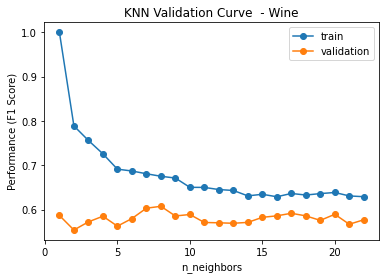

CPU times: user 214 ms, sys: 15.5 ms, total: 230 ms
Wall time: 513 ms


In [599]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform'],
    'n_neighbors': range(1,23),
    # 'leaf_size': [10, 20, 25, 30, 35, 40, 50]
}
uni_knn_params2, uni_knn_cv_result2 = tune_hyper(X2_train, y2_train, classifier, param_grid)
print(uni_knn_params2)
model_type = 'KNN'
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=uni_knn_params2, cv_result=uni_knn_cv_result2, model_type=model_type, data_name=data2_name)
# hyper = 'leaf_size'
# plot_validation_curve(hyper, params=best_knn_params2, cv_result=knn_cv_result2, model_type=model_type, data_name=data2_name)

### turn of cv

#### data1

Best classifier is KNeighborsClassifier(n_neighbors=12, weights='distance') with f1 score 0.7630877208422256
{'n_neighbors': 12, 'weights': 'distance'}


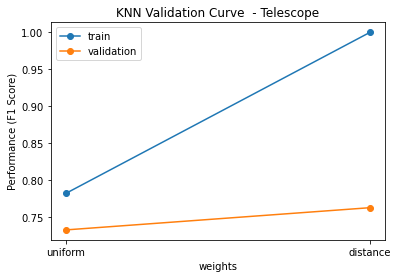

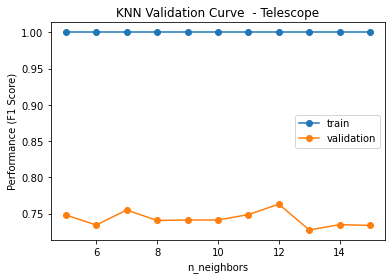

CPU times: user 238 ms, sys: 16.4 ms, total: 255 ms
Wall time: 325 ms


In [564]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,14,15],
    # 'leaf_size': [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
}
one_knn_params1, one_knn_cv_result1 = tune_hyper_wo_cv(X1_train, y1_train, classifier, param_grid)
print(one_knn_params1)
model_type = 'KNN'
hyper = 'weights'
plot_validation_curve(hyper, params=one_knn_params1, cv_result=one_knn_cv_result1, model_type=model_type, data_name=data1_name)
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=one_knn_params1, cv_result=one_knn_cv_result1, model_type=model_type, data_name=data1_name)

#### data2

Best classifier is KNeighborsClassifier(n_neighbors=7, weights='distance') with f1 score 0.6114214964682254
{'n_neighbors': 7, 'weights': 'distance'}


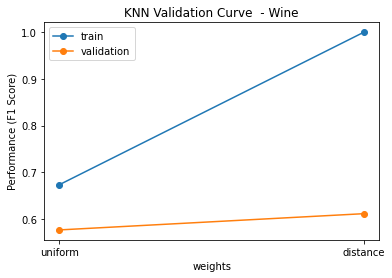

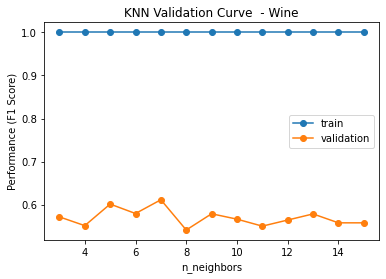

CPU times: user 239 ms, sys: 16.2 ms, total: 255 ms
Wall time: 333 ms


In [566]:
%%time
classifier = KNeighborsClassifier()
param_grid = {
    # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13,14,15],
    # 'leaf_size': [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
}
one_knn_params2, one_knn_cv_result2 = tune_hyper_wo_cv(X2_train, y2_train, classifier, param_grid)
print(one_knn_params2)
model_type = 'KNN'
hyper = 'weights'
plot_validation_curve(hyper, params=one_knn_params2, cv_result=one_knn_cv_result2, model_type=model_type, data_name=data2_name)
hyper = 'n_neighbors'
plot_validation_curve(hyper, params=one_knn_params2, cv_result=one_knn_cv_result2, model_type=model_type, data_name=data2_name)

## learning curve

### train percentage

,f1_train,f1_val,train_pct
0,1.0,0.712883,10
1,1.0,0.730138,20
2,1.0,0.735228,30
3,1.0,0.735716,40
4,1.0,0.747051,50
5,1.0,0.735227,60
6,1.0,0.746094,70
7,1.0,0.759781,80
8,1.0,0.771153,90


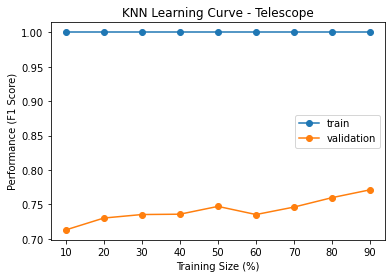

In [600]:
best_knn_classifier1 = KNeighborsClassifier(**best_knn_params1)
knn_f1_1 = get_f1_score_vs_train_pct(X1_train, y1_train, best_knn_classifier1)
plot_learning_curve(knn_f1_1, model_type='KNN', data_name=data1_name)

,f1_train,f1_val,train_pct
0,1.0,0.521859,10
1,1.0,0.556904,20
2,1.0,0.573519,30
3,1.0,0.592715,40
4,1.0,0.604772,50
5,1.0,0.613505,60
6,1.0,0.614279,70
7,1.0,0.624408,80
8,1.0,0.626275,90


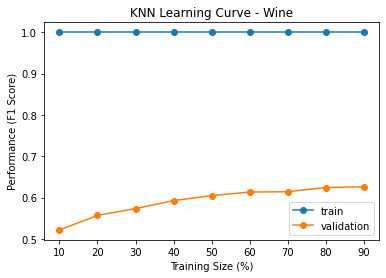

In [601]:
best_knn_classifier2 = KNeighborsClassifier(**best_knn_params2)
knn_f1_2 = get_f1_score_vs_train_pct(X2_train, y2_train, best_knn_classifier2)
plot_learning_curve(knn_f1_2, model_type='KNN', data_name=data2_name)

### time

,train_time,pred_time,train_pct
0,0.000721,0.000781,10
1,0.000548,0.000830,20
2,0.000585,0.000985,30
3,0.000617,0.001184,40
4,0.000666,0.001460,50
5,0.000687,0.001770,60
6,0.000759,0.002020,70
7,0.000779,0.002218,80
8,0.000848,0.002655,90
9,0.000858,0.003039,100


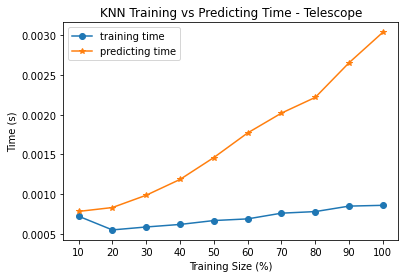

In [602]:
plot_time_100(X1_train_train, y1_train_train, best_knn_classifier1, model_type='KNN', data_name=data1_name)

,train_time,pred_time,train_pct
0,0.000583,0.000796,10
1,0.000553,0.001040,20
2,0.000591,0.001310,30
3,0.000645,0.001684,40
4,0.000674,0.002280,50
5,0.000741,0.002659,60
6,0.000747,0.003247,70
7,0.000769,0.003632,80
8,0.000854,0.004982,90
9,0.000887,0.005520,100


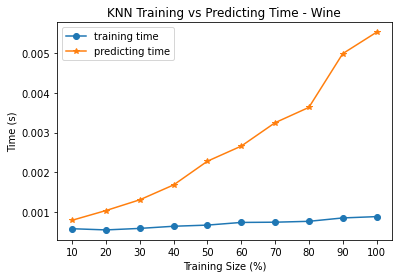

In [603]:
plot_time_100(X2_train_train, y2_train_train, best_knn_classifier2, model_type='KNN', data_name=data2_name)

## test performance

### data1

Test performance:
              precision    recall  f1-score   support

           g       0.78      0.86      0.82       153
           h       0.84      0.75      0.79       147

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



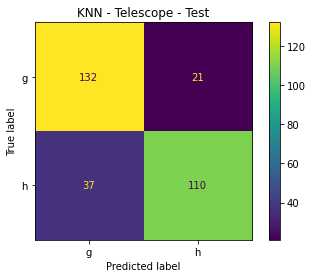

Train performance:
              precision    recall  f1-score   support

           g       1.00      1.00      1.00       357
           h       1.00      1.00      1.00       343

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



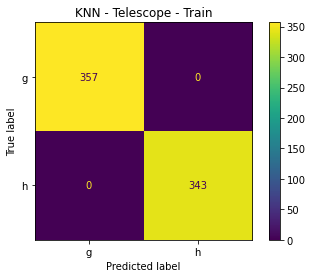

Train time is 0.0037 seconds.
Prediction time is 0.0026 seconds.


In [604]:
best_knn_classifier1 = KNeighborsClassifier(**best_knn_params1)
knn_train_t1, knn_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, best_knn_classifier1, model_type='KNN', 
                                                data_name=data1_name)

### data2

Test performance:
              precision    recall  f1-score   support

           5       0.74      0.75      0.74       120
           6       0.61      0.67      0.64       120
           7       0.72      0.57      0.64        60

    accuracy                           0.68       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.68      0.68      0.68       300



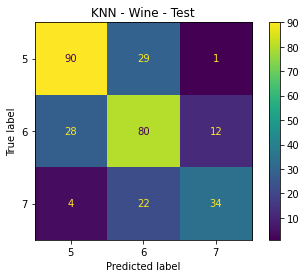

Train performance:
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       280
           6       1.00      1.00      1.00       280
           7       1.00      1.00      1.00       139

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



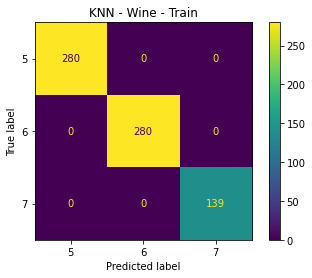

Train time is 0.0042 seconds.
Prediction time is 0.0038 seconds.


In [605]:
best_knn_classifier2 = KNeighborsClassifier(**best_knn_params2)
knn_train_t2, knn_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, best_knn_classifier2, model_type='KNN', 
                                                data_name=data2_name)

### turn off cv

#### data1

Test performance:
              precision    recall  f1-score   support

           g       0.76      0.86      0.81       153
           h       0.83      0.72      0.77       147

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



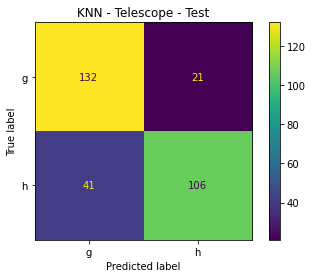

Train performance:
              precision    recall  f1-score   support

           g       1.00      1.00      1.00       357
           h       1.00      1.00      1.00       343

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



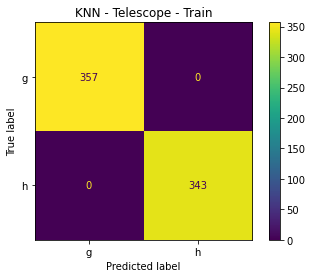

Train time is 0.0036 seconds.
Prediction time is 0.003 seconds.


In [568]:
one_knn_classifier1 = KNeighborsClassifier(**one_knn_params1)
one_knn_train_t1, one_knn_pred_t1 = model_performance(X1_train, y1_train, X1_test, y1_test, one_knn_classifier1, model_type='KNN', 
                                                data_name=data1_name)

#### data2

Test performance:
              precision    recall  f1-score   support

           5       0.73      0.68      0.70       120
           6       0.59      0.66      0.62       120
           7       0.67      0.58      0.63        60

    accuracy                           0.65       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.66      0.65      0.65       300



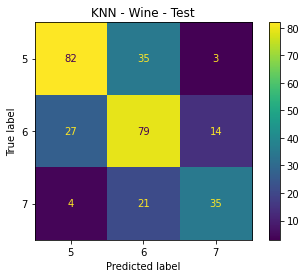

Train performance:
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       280
           6       1.00      1.00      1.00       280
           7       1.00      1.00      1.00       139

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



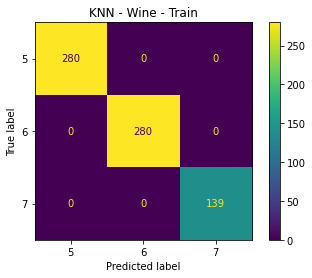

Train time is 0.0044 seconds.
Prediction time is 0.0036 seconds.


In [569]:
one_knn_classifier2 = KNeighborsClassifier(**one_knn_params1)
one_knn_train_t2, one_knn_pred_t2 = model_performance(X2_train, y2_train, X2_test, y2_test, one_knn_classifier2, model_type='KNN', 
                                                data_name=data2_name)

# Comparison

In [253]:
labels = ['Decision Tree', 'ANN', 'SVM', 'AdaBoost', 'KNN']

## Time

In [613]:
time_df1

,Training,Prediction
Decision Tree,0.0088,0.0005
ANN,1.7656,0.0007
SVM,0.0244,0.0035
AdaBoost,0.3830,0.0192
KNN,0.0037,0.0026


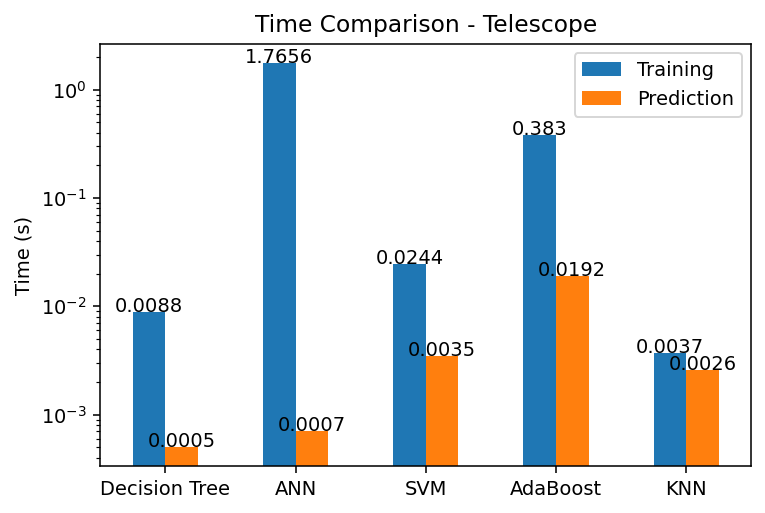

In [621]:
train_t1 = [tree_train_t1, ann_train_t1, svm_train_t1, ada_train_t1, knn_train_t1]
pred_t1 = [tree_pred_t1, ann_pred_t1, svm_pred_t1, ada_pred_t1, knn_pred_t1]
time_df1 = pd.DataFrame({'Training': train_t1, 'Prediction': pred_t1}, index=labels)
fig = plt.figure(dpi=140)
axes = time_df1.plot.bar(rot=0, logy=True, title=f'Time Comparison - {data1_name}', ax=plt.gca())
plt.ylabel('Time (s)')
for patch in axes.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.92 to move the text up and down
    y = patch.get_height() + bl[1] 
    axes.text(x,y,str(patch.get_height()), ha='center')
plt.show()

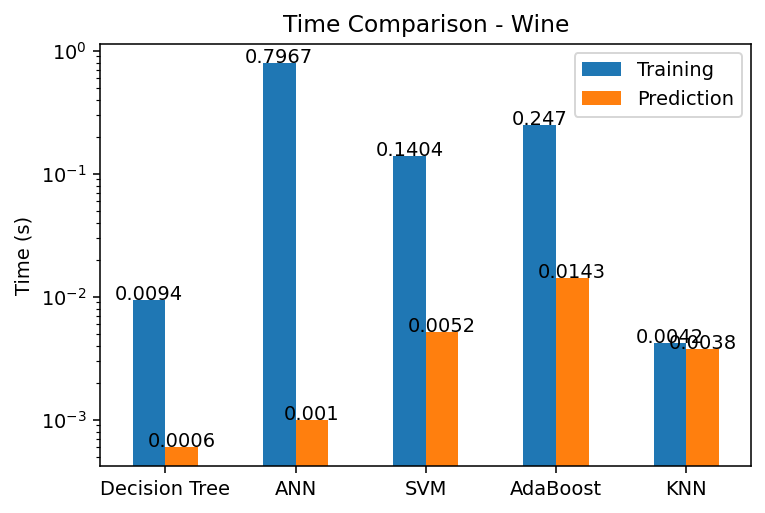

In [622]:
train_t2 = [tree_train_t2, ann_train_t2, svm_train_t2, ada_train_t2, knn_train_t2]
pred_t2 = [tree_pred_t2, ann_pred_t2, svm_pred_t2, ada_pred_t2, knn_pred_t2]
time_df2 = pd.DataFrame({'Training': train_t2, 'Prediction': pred_t2}, index=labels)
fig = plt.figure(dpi=140)
axes = time_df2.plot.bar(rot=0, logy=True, title=f'Time Comparison - {data2_name}', ax=plt.gca())
plt.ylabel('Time (s)')
for patch in axes.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.92 to move the text up and down
    y = patch.get_height() + bl[1] 
    axes.text(x,y,str(patch.get_height()), ha='center')
plt.show()

## Performance

In [560]:
def model_f1(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    f1_train = f1_score(y_train, pred_train, average="weighted")
    f1_test = f1_score(y_test, pred_test, average="weighted")
    return f1_train, f1_test
def all_model_f1_1(X_train, y_train, X_test, y_test):
    f1_train_ls = []
    f1_test_ls = []
    for clf in [best_tree_classifier1, best_ann_classifier1, best_svm_classifier1, best_ada_classifier1, best_knn_classifier1]:
        f1_train, f1_test = model_f1(clf, X_train, y_train, X_test, y_test)
        f1_train_ls.append(f1_train)
        f1_test_ls.append(f1_test)
    return f1_train_ls, f1_test_ls
def all_model_f1_2(X_train, y_train, X_test, y_test):
    f1_train_ls = []
    f1_test_ls = []
    for clf in [best_tree_classifier2, best_ann_classifier2, best_svm_classifier2, best_ada_classifier2, best_knn_classifier2]:
        f1_train, f1_test = model_f1(clf, X_train, y_train, X_test, y_test)
        f1_train_ls.append(f1_train)
        f1_test_ls.append(f1_test)
    return f1_train_ls, f1_test_ls

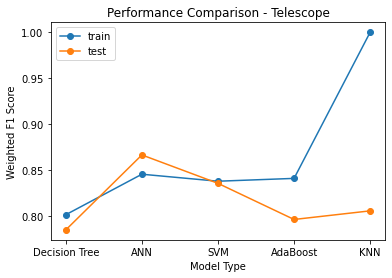

In [607]:
f1_train_ls1, f1_test_ls1 = all_model_f1_1(X1_train, y1_train, X1_test, y1_test)
plt.plot(range(len(labels)), f1_train_ls1, 'o-', label='train')
plt.plot(range(len(labels)), f1_test_ls1, 'o-', label='test')
plt.xticks(range(len(labels)), labels)
plt.xlabel('Model Type')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.title(f'Performance Comparison - {data1_name}')
plt.show()

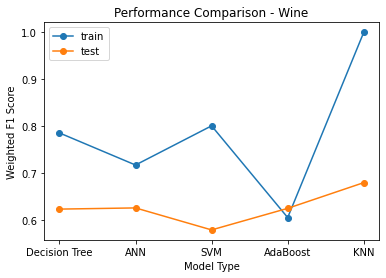

In [609]:
f1_train_ls2, f1_test_ls2 = all_model_f1_2(X2_train, y2_train, X2_test, y2_test)
plt.plot(range(len(labels)), f1_train_ls2, 'o-', label='train')
plt.plot(range(len(labels)), f1_test_ls2, 'o-', label='test')
plt.xticks(range(len(labels)), labels)
plt.xlabel('Model Type')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.title(f'Performance Comparison - {data2_name}')
plt.show()

In [558]:
f1_train_ls1, f1_test_ls1

([0.8017092185203688,
  0.8457142857142858,
  0.8381099441569752,
  0.8411901181525241,
  1.0],
 [0.7851936872309899,
  0.866678520625889,
  0.8325281803542672,
  0.7965422401228318,
  0.8059064301353949])

In [608]:
f1_train_ls2, f1_test_ls2

([0.7854883996291332,
  0.7171067278117884,
  0.8005946642510998,
  0.6051341355959263,
  1.0],
 [0.623165250536012,
  0.625703003948618,
  0.5788290153397216,
  0.6248001782796018,
  0.6508346310386735])